# Logistic and Softmax Regression for Handwritten Digits Classification 
Programming Assignment 1
CSE 253: Neural Networks for Pattern Recognition, by Prof. Gary Cottrell

Shilin Zhu
Ph.D. student, Computer Science, UCSD
shz338@eng.ucsd.edu

## Packages
Run the code below to import the packages we need in this assignment.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## Read MNIST
MNIST is a handwritten digit database by Yann LeCun. To reduce the computation, we only use 20000 images for training and 2000 images for testing.

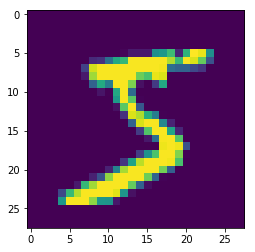

In [2]:
from mnist import MNIST
mndata = MNIST('./python-mnist/data')
train_images, train_labels = mndata.load_training()
test_images, test_labels = mndata.load_testing()
plt.imshow(np.array(train_images[0]).reshape([28,28]))

We only use 20000 images for training and 2000 images for testing.

In [3]:
train_images = np.array(train_images)
test_images = np.array(test_images)
train_labels = np.array(train_labels).reshape([60000,1])
test_labels = np.array(test_labels).reshape([10000,1])
print(train_labels.shape)

(60000, 1)


In [107]:
print((train_images[1,:]).reshape(784,1).shape)

(784, 1)


We need to only retain the examples with two labels to perform binary classification.

In [4]:
train_size = train_images.shape[0]
test_size = test_images.shape[0]
train_images_sub = np.zeros([784,train_size])
train_labels_sub = np.zeros([1,train_size])
test_images_sub = np.zeros([784,test_size])
test_labels_sub = np.zeros([1,test_size])
counter = 0
for i in range(0,train_size):
    if train_labels[i][0] == 2 or train_labels[i][0] == 8:
        train_images_sub[:,counter] = train_images[i,:]
        if train_labels[i][0] == 2:
            train_labels_sub[:,counter] = train_labels[i,:]-2
        if train_labels[i][0] == 8:
            train_labels_sub[:,counter] = train_labels[i,:]-7
        counter = counter + 1
        if counter == 20000:
            break
        
validation_images_sub = train_images_sub[:,0:int(counter*0.1)]
validation_labels_sub = train_labels_sub[:,0:int(counter*0.1)]
train_images_sub = train_images_sub[:,int(counter*0.1)+1:counter-1]
train_labels_sub = train_labels_sub[:,int(counter*0.1)+1:counter-1]


counter = 0
for i in range(0,test_size):
    if test_labels[i][0] == 2 or test_labels[i][0] == 8:
        test_images_sub[:,counter] = test_images[i,:]
        if test_labels[i][0] == 2:
            test_labels_sub[:,counter] = test_labels[i,:]-2
        if test_labels[i][0] == 8:
            test_labels_sub[:,counter] = test_labels[i,:]-7
        counter = counter + 1        
        if counter == 2000:
            break;
        
test_images_sub = test_images_sub[:,0:counter-1]
test_labels_sub = test_labels_sub[:,0:counter-1]

In [840]:
train_size = train_images.shape[0]
test_size = test_images.shape[0]
train_images_sub = np.zeros([784,train_size])
train_labels_sub = np.zeros([1,train_size])
test_images_sub = np.zeros([784,test_size])
test_labels_sub = np.zeros([1,test_size])
counter = 0
for i in range(0,train_size):
    if train_labels[i][0] == 2 or train_labels[i][0] == 3:
        train_images_sub[:,counter] = train_images[i,:]
        if train_labels[i][0] == 2:
            train_labels_sub[:,counter] = train_labels[i,:]-2
        if train_labels[i][0] == 3:
            train_labels_sub[:,counter] = train_labels[i,:]-2
        counter = counter + 1
        if counter == 20000:
            break
        
validation_images_sub = train_images_sub[:,0:int(counter*0.1)]
validation_labels_sub = train_labels_sub[:,0:int(counter*0.1)]
train_images_sub = train_images_sub[:,int(counter*0.1)+1:counter-1]
train_labels_sub = train_labels_sub[:,int(counter*0.1)+1:counter-1]


counter = 0
for i in range(0,test_size):
    if test_labels[i][0] == 2 or test_labels[i][0] == 3:
        test_images_sub[:,counter] = test_images[i,:]
        if test_labels[i][0] == 2:
            test_labels_sub[:,counter] = test_labels[i,:]-2
        if test_labels[i][0] == 3:
            test_labels_sub[:,counter] = test_labels[i,:]-2
        counter = counter + 1        
        if counter == 2000:
            break;
        
test_images_sub = test_images_sub[:,0:counter-1]
test_labels_sub = test_labels_sub[:,0:counter-1]

(784, 10627)


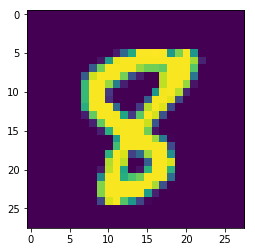

In [988]:
print(train_images_sub.shape)
plt.imshow(np.array(train_images_sub[:,8]).reshape([28,28]))

## Add a Hold-Out (Validation) Set

In [6]:
validation_set_x = validation_images_sub/255.
validation_set_y = validation_labels_sub
print(validation_set_x.shape)

(784, 1180)


## Feature Normalization

We then normalize the features (already flattened) by dividing over 255.

In [7]:
train_set_x = train_images_sub/255.
test_set_x = test_images_sub/255.
train_set_y = train_labels_sub
test_set_y = test_labels_sub

In [648]:
print(train_set_x[:,0])

[ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.

Generally, we perform the following steps:
-initialize the parameters
-learn the parameters using logistic/softmax regression
-use the learned parameters to make predictions
-analyze and conclude

We first build some helper functions so that we will build the entire model later based on these functions.

## Activation Functions

In [9]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    """
    a = 1/(1+np.exp(-z))  
    return a

## Initializing parameters

For logistic/softmax regression, zero initialization can work reasonably well.

In [10]:
def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.

    """
    w = np.zeros([dim,1])
    b = 0
    
    return w, b

## Forward and Backward Propagation

Logistic regression is a simple one-layer neural network, so we reuse the term forward propagation and backward propagation here.

In [786]:
print(np.sign([-2]))

[-1]


In [11]:
def propagate(w, b, X, Y, lambda_reg, reg_type):
    """
    Implement the cost function and its gradient for the propagation
    
    """
    
    m = X.shape[1]
    A = sigmoid(np.dot(w.T,X)+b)
    
    if reg_type == 2:
        cost = -(1/m)*np.sum(np.multiply(Y,np.log(A))+np.multiply(1-Y,np.log(1-A)),keepdims=True) + (lambda_reg/2) * np.sum(np.power(w,2)) 
        dw = (1/m)*(np.dot(X,(A-Y).T)) + (lambda_reg) * w
    if reg_type == 1:
        cost = -(1/m)*np.sum(np.multiply(Y,np.log(A))+np.multiply(1-Y,np.log(1-A)),keepdims=True) + (lambda_reg) * np.sum(np.abs(w))
        dw = (1/m)*(np.dot(X,(A-Y).T)) + (lambda_reg) * np.sign(w)
    
    db = (1/m)*np.sum(A-Y,keepdims=True)

    cost = np.squeeze(cost)
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [258]:
np.sum(np.power([[1,2],[2,3]],2))

18

## Gradient Descent Optimization

After we compute the gradients, we can use gradient descent to optimize the parameters.

In [12]:
def optimize(w, b, X, Y, X_val, Y_val, X_test, Y_test, lambda_reg, reg_type, num_iterations, learning_rate, print_cost = False, early_stopping = True):
    """
    This function optimizes w and b by running a gradient descent algorithm

    """
    
    training_costs = []
    val_costs = []
    test_costs = []
    w_prev = w
    w_prevprev = w
    b_prev = b
    b_prevprev = b
    prediction_accuracy_early_train = []
    prediction_accuracy_early_val = []
    prediction_accuracy_early_test = []

    for i in range(num_iterations):
        if early_stopping == True:
            Y_prediction_test = predict(w, b, X_test)
            Y_prediction_train = predict(w, b, X)
            Y_prediction_val = predict(w, b, X_val)
            
            train_temp_accuracy = 100 - np.mean(np.abs(Y_prediction_train - Y)) * 100;
            val_temp_accuracy = 100 - np.mean(np.abs(Y_prediction_val - Y_val)) * 100;
            test_temp_accuracy = 100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100;
            
            prediction_accuracy_early_train.append(train_temp_accuracy)
            prediction_accuracy_early_val.append(val_temp_accuracy)
            prediction_accuracy_early_test.append(test_temp_accuracy)
            
            if np.array(prediction_accuracy_early_val).shape[0] > 3:
                if prediction_accuracy_early_val[i] < prediction_accuracy_early_val[i-1] and prediction_accuracy_early_val[i-1] < prediction_accuracy_early_val[i-2] and prediction_accuracy_early_val[i-2] < prediction_accuracy_early_val[i-3]:
                    w = w_prevprev
                    b = b_prevprev
                    print('stopped!')
                    break
    
        
        grads, cost = propagate(w, b, X, Y, lambda_reg, reg_type)
        val_grads, val_cost = propagate(w, b, X_val, Y_val, lambda_reg, reg_type)
        test_grads, test_cost = propagate(w, b, X_test, Y_test, lambda_reg, reg_type)
        
        dw = grads["dw"]
        db = grads["db"]
        
        w_prevprev = w_prev
        b_prevprev = b_prev
        w_prev = w
        b_prev = b
        w = w-learning_rate*dw
        b = b-learning_rate*db           
        
        

        if i % 200 == 0:
            training_costs.append(cost)
            val_costs.append(val_cost)
            test_costs.append(test_cost)
        
        if print_cost and i % 200 == 0:
            print ("Training cost after iteration %i: %f" %(i, cost))
            print ("Validation cost after iteration %i: %f" %(i, val_cost))
            print ("Test cost after iteration %i: %f" %(i, test_cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, training_costs, val_costs, test_costs, prediction_accuracy_early_train, prediction_accuracy_early_val, prediction_accuracy_early_test

## Predictions

Using the learned parameters to predict labels for the unseen examples.

In [13]:
def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)

    '''
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    A = sigmoid(np.dot(w.T,X)+b)
    
    for i in range(A.shape[1]):
        
        Y_prediction[0,i] = np.where(A[0,i]>0.5,1,0)
    
    return Y_prediction

## Build the Entire Model

Using our implemented helper functions, we can now build the entire model by combining them together.

In [14]:
def model(X_train, Y_train, X_val, Y_val, X_test, Y_test, lambda_reg, reg_type, num_iterations = 5000, learning_rate = 0.5, print_cost = True, early_stopping = True):
    """
    Builds the logistic regression model by calling the function you've implemented previously

    """
    
    w, b = np.zeros((X_train.shape[0],1)), 0.
    
    parameters, grads, costs, val_costs, test_costs, prediction_accuracy_early_train, prediction_accuracy_early_val, prediction_accuracy_early_test = optimize(w, b, X_train, Y_train, X_val, Y_val, X_test, Y_test, lambda_reg, reg_type, num_iterations, learning_rate, print_cost = True, early_stopping = True)
    
    w = parameters["w"]
    b = parameters["b"]
    
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)
    Y_prediction_val = predict(w, b, X_val)

    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("Hold-out validation set accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_val - Y_val)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "val_costs": val_costs,
         "test_costs": test_costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "Y_prediction_val": Y_prediction_val,
         "Y_prediction_train_early": prediction_accuracy_early_train,
         "Y_prediction_test_early": prediction_accuracy_early_test,
         "Y_prediction_val_early": prediction_accuracy_early_val,
         "final_test_accuracy": 100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100,
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

## Training the Model

we can now use the following code to train the model.

In [991]:
d = model(train_set_x, train_set_y, validation_set_x, validation_set_y, test_set_x, test_set_y, lambda_reg = 0, reg_type = 2, num_iterations = 5000, learning_rate = 0.01, print_cost = True, early_stopping = False)

Training cost after iteration 0: 0.693147
Validation cost after iteration 0: 0.693147
Test cost after iteration 0: 0.693147
Training cost after iteration 200: 0.245304
Validation cost after iteration 200: 0.235156
Test cost after iteration 200: 0.240567
Training cost after iteration 400: 0.187324
Validation cost after iteration 400: 0.175257
Test cost after iteration 400: 0.181406
Training cost after iteration 600: 0.162813
Validation cost after iteration 600: 0.149751
Test cost after iteration 600: 0.156067
Training cost after iteration 800: 0.148744
Validation cost after iteration 800: 0.135001
Test cost after iteration 800: 0.141349
Training cost after iteration 1000: 0.139415
Validation cost after iteration 1000: 0.125152
Test cost after iteration 1000: 0.131492
Training cost after iteration 1200: 0.132682
Validation cost after iteration 1200: 0.117995
Test cost after iteration 1200: 0.124317
Training cost after iteration 1400: 0.127540
Validation cost after iteration 1400: 0.11249

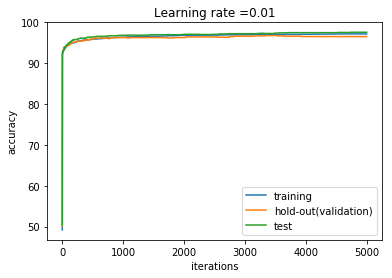

In [985]:
train_accuracy = np.squeeze(d['Y_prediction_train_early'])
val_accuracy = np.squeeze(d['Y_prediction_val_early'])
test_accuracy = np.squeeze(d['Y_prediction_test_early'])
plt.plot(train_accuracy)
plt.plot(val_accuracy)
plt.plot(test_accuracy)
plt.legend(['training', 'hold-out(validation)', 'test'], loc='lower right')
plt.ylabel('accuracy')
plt.xlabel('iterations')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

(array([], dtype=int64),)


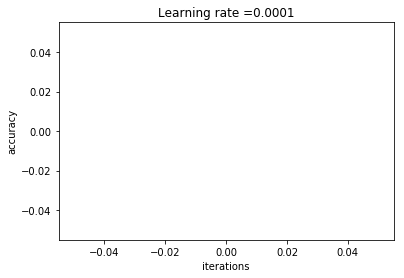

In [795]:
train_accuracy = np.squeeze(d['Y_prediction_train_early'])
val_accuracy = np.squeeze(d['Y_prediction_val_early'])
test_accuracy = np.squeeze(d['Y_prediction_test_early'])
print(np.where(val_accuracy[1:999]-val_accuracy[0:998] < 0))
#plt.plot(train_accuracy)
plt.plot(val_accuracy)
#plt.plot(test_accuracy)
plt.ylabel('accuracy')
plt.xlabel('iterations')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

Let's now plot the cost function curve with number of iterations.

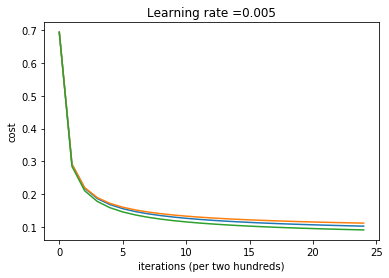

In [846]:
costs = np.squeeze(d['costs'])
val_costs = np.squeeze(d['val_costs'])
test_costs = np.squeeze(d['test_costs'])
plt.plot(costs)
plt.plot(val_costs)
plt.plot(test_costs)
plt.ylabel('cost')
plt.xlabel('iterations (per two hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

## Weight Visualization

(784, 1)


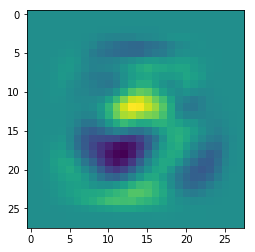

In [848]:
w = d["w"]
print(w.shape)
plt.imshow(w.reshape([28,28]))

In [852]:
w_2_3 = w

In [649]:
d = model(train_set_x, train_set_y, validation_set_x, validation_set_y, test_set_x, test_set_y, lambda_reg = 0, num_iterations = 1000, learning_rate = 0.01, print_cost = True, early_stopping = False)

Training cost after iteration 0: 0.693147
Validation cost after iteration 0: 0.693147
Test cost after iteration 0: 0.693147
Training cost after iteration 50: 0.426683
Validation cost after iteration 50: 0.421291
Test cost after iteration 50: 0.423923
Training cost after iteration 100: 0.327135
Validation cost after iteration 100: 0.319270
Test cost after iteration 100: 0.323393
Training cost after iteration 150: 0.276355
Validation cost after iteration 150: 0.267112
Test cost after iteration 150: 0.272044
Training cost after iteration 200: 0.245304
Validation cost after iteration 200: 0.235156
Test cost after iteration 200: 0.240567
Training cost after iteration 250: 0.224145
Validation cost after iteration 250: 0.213340
Test cost after iteration 250: 0.219056
Training cost after iteration 300: 0.208672
Validation cost after iteration 300: 0.197360
Test cost after iteration 300: 0.203277
Training cost after iteration 350: 0.196788
Validation cost after iteration 350: 0.185065
Test cost

(784, 1)


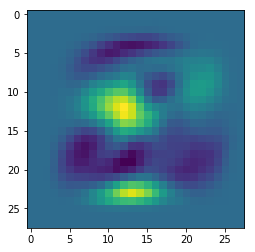

In [650]:
w = d["w"]
print(w.shape)
plt.imshow(w.reshape([28,28]))

In [651]:
w_2_8 = w

(784, 1)


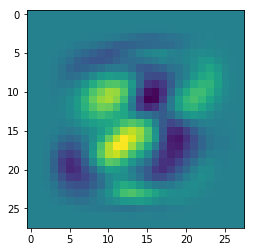

In [652]:
print((w_2_8 - w_2_3).shape)
plt.imshow((w_2_8 - w_2_3).reshape([28,28]))

## L2 Regularization

The previous code does not include any regularization (lambda = 0) so it may overfit if we don't carefully setup the features.

In [766]:
d = model(train_set_x, train_set_y, validation_set_x, validation_set_y, test_set_x, test_set_y, lambda_reg = 0.01, reg_type = 2, num_iterations = 5000, learning_rate = 0.005, print_cost = True, early_stopping = False)

Training cost after iteration 0: 0.693147
Validation cost after iteration 0: 0.693147
Test cost after iteration 0: 0.693147
Training cost after iteration 200: 0.549715
Validation cost after iteration 200: 0.547161
Test cost after iteration 200: 0.548254
Training cost after iteration 400: 0.460710
Validation cost after iteration 400: 0.456115
Test cost after iteration 400: 0.458282
Training cost after iteration 600: 0.401911
Validation cost after iteration 600: 0.395906
Test cost after iteration 600: 0.398890
Training cost after iteration 800: 0.360682
Validation cost after iteration 800: 0.353650
Test cost after iteration 800: 0.357254
train accuracy: 94.57043380069634 %
Hold-out validation set accuracy: 95.0 %
test accuracy: 94.4472236118059 %


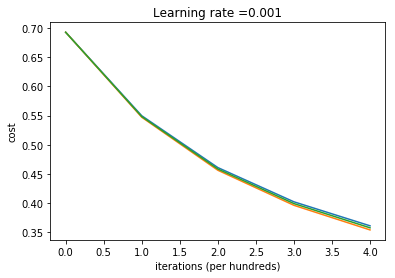

In [767]:
costs = np.squeeze(d['costs'])
val_costs = np.squeeze(d['val_costs'])
test_costs = np.squeeze(d['test_costs'])
plt.plot(costs)
plt.plot(val_costs)
plt.plot(test_costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

## Visualize the Weights

(784, 1)


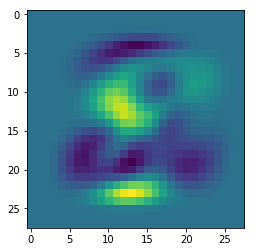

In [768]:
w = d["w"]
print(w.shape)
plt.imshow(w.reshape([28,28]))

## L1 Regularization

We can also use L1 regularization instead of L2.

In [771]:
d = model(train_set_x, train_set_y, validation_set_x, validation_set_y, test_set_x, test_set_y, lambda_reg = 0.01, reg_type = 1, num_iterations = 1000, learning_rate = 0.0001, print_cost = True, early_stopping = False)

Training cost after iteration 0: 0.693147
Validation cost after iteration 0: 0.693147
Test cost after iteration 0: 0.693147
Training cost after iteration 200: 0.679196
Validation cost after iteration 200: 0.678585
Test cost after iteration 200: 0.678871
Training cost after iteration 400: 0.666055
Validation cost after iteration 400: 0.664915
Test cost after iteration 400: 0.665450
Training cost after iteration 600: 0.653675
Validation cost after iteration 600: 0.652070
Test cost after iteration 600: 0.652825
Training cost after iteration 800: 0.642009
Validation cost after iteration 800: 0.639991
Test cost after iteration 800: 0.640944
train accuracy: 93.54474451867884 %
Hold-out validation set accuracy: 94.40677966101696 %
test accuracy: 93.39669834917459 %


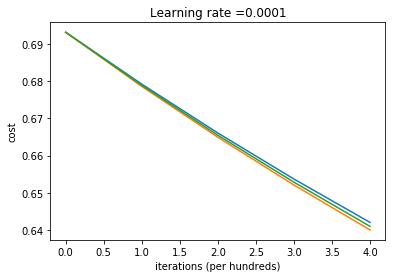

In [772]:
costs = np.squeeze(d['costs'])
val_costs = np.squeeze(d['val_costs'])
test_costs = np.squeeze(d['test_costs'])
plt.plot(costs)
plt.plot(val_costs)
plt.plot(test_costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

(784, 1)


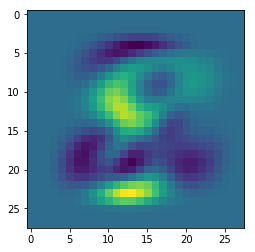

In [773]:
w = d["w"]
print(w.shape)
plt.imshow(w.reshape([28,28]))

## Reality Check on L1 Weight Norm

In [15]:
lambda_cand = [100, 10, 1, 0.3, 0.1, 0.03, 0.01, 0.003, 0.001, 0.0003, 0.0001]
norm_len = []
accuracy_train_L1 = []
accuracy_val_L1 = []
accuracy_test_L1 = []
w_L1_lambda = []
final_test_set_accuracy_L1 = []

for i in range(0,11):
    d = model(train_set_x, train_set_y, validation_set_x, validation_set_y, test_set_x, test_set_y, lambda_reg = lambda_cand[i], reg_type = 1, num_iterations = 5000, learning_rate = 0.005, print_cost = False, early_stopping = True)
    w = d["w"]
    w_L1_lambda.append(w)
    accuracy_train_L1.append(d["Y_prediction_train_early"])
    accuracy_val_L1.append(d["Y_prediction_val_early"])
    accuracy_test_L1.append(d["Y_prediction_test_early"])
    norm_len.append(np.sum(np.abs(w), keepdims=True))
    final_test_set_accuracy_L1.append(d["final_test_accuracy"])

Training cost after iteration 0: 0.693147
Validation cost after iteration 0: 0.693147
Test cost after iteration 0: 0.693147


/Users/shilinzhu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  


Training cost after iteration 200: inf
Validation cost after iteration 200: inf
Test cost after iteration 200: inf
Training cost after iteration 400: inf
Validation cost after iteration 400: inf
Test cost after iteration 400: inf
Training cost after iteration 600: inf
Validation cost after iteration 600: 26601.718672
Test cost after iteration 600: inf
Training cost after iteration 800: inf
Validation cost after iteration 800: 25066.414852
Test cost after iteration 800: 25066.203796
Training cost after iteration 1000: 23691.325034
Validation cost after iteration 1000: 23691.422152
Test cost after iteration 1000: 23691.198352
Training cost after iteration 1200: 22697.716731
Validation cost after iteration 1200: 22697.774605
Test cost after iteration 1200: 22697.505996
Training cost after iteration 1400: 22011.516500
Validation cost after iteration 1400: 22011.571847
Test cost after iteration 1400: 22011.310407
Training cost after iteration 1600: 21597.211605
Validation cost after iterati

Training cost after iteration 1600: 0.224423
Validation cost after iteration 1600: 0.223463
Test cost after iteration 1600: 0.216292
Training cost after iteration 1800: 0.221458
Validation cost after iteration 1800: 0.220450
Test cost after iteration 1800: 0.213015
Training cost after iteration 2000: 0.219049
Validation cost after iteration 2000: 0.217998
Test cost after iteration 2000: 0.210322
Training cost after iteration 2200: 0.217071
Validation cost after iteration 2200: 0.215976
Test cost after iteration 2200: 0.208081
Training cost after iteration 2400: 0.215420
Validation cost after iteration 2400: 0.214289
Test cost after iteration 2400: 0.206187
Training cost after iteration 2600: 0.214017
Validation cost after iteration 2600: 0.212842
Test cost after iteration 2600: 0.204551
Training cost after iteration 2800: 0.212821
Validation cost after iteration 2800: 0.211588
Test cost after iteration 2800: 0.203128
Training cost after iteration 3000: 0.211778
Validation cost after it

Training cost after iteration 3800: 0.128936
Validation cost after iteration 3800: 0.128980
Test cost after iteration 3800: 0.120009
Training cost after iteration 4000: 0.127746
Validation cost after iteration 4000: 0.127839
Test cost after iteration 4000: 0.118703
Training cost after iteration 4200: 0.126650
Validation cost after iteration 4200: 0.126793
Test cost after iteration 4200: 0.117500
Training cost after iteration 4400: 0.125637
Validation cost after iteration 4400: 0.125829
Test cost after iteration 4400: 0.116385
Training cost after iteration 4600: 0.124697
Validation cost after iteration 4600: 0.124937
Test cost after iteration 4600: 0.115348
Training cost after iteration 4800: 0.123821
Validation cost after iteration 4800: 0.124108
Test cost after iteration 4800: 0.114381
train accuracy: 96.47125247012328 %
Hold-out validation set accuracy: 96.61016949152543 %
test accuracy: 96.34817408704352 %
Training cost after iteration 0: 0.693147
Validation cost after iteration 0: 

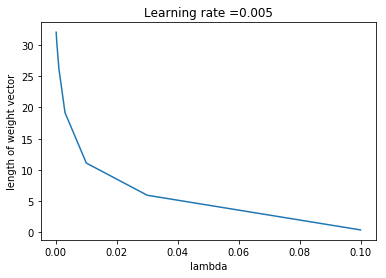

In [954]:
plt.plot(np.squeeze(np.array([0.1, 0.03, 0.01, 0.003, 0.001, 0.0003, 0.0001]).reshape(1,7)),np.squeeze(np.array(norm_len[4:11]).reshape(1,7)))
plt.ylabel('length of weight vector')
plt.xlabel('lambda')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

We now plot the accuracy during the training with different regularization values.

In [939]:
print(np.squeeze(np.array(accuracy_train_L1)[0]))

[ 49.18650611  92.0672856   14.41308944 ...,  28.60557036  69.13319239
  28.74345068]


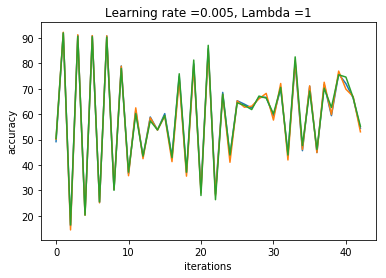

In [1009]:
accuracy_train_L1_red = np.squeeze(np.array(accuracy_train_L1)[2])
accuracy_val_L1_red = np.squeeze(np.array(accuracy_val_L1)[2])
accuracy_test_L1_red = np.squeeze(np.array(accuracy_test_L1)[2])

plt.plot(accuracy_train_L1_red)
plt.plot(accuracy_val_L1_red)
plt.plot(accuracy_test_L1_red)
plt.ylabel('accuracy')
plt.xlabel('iterations')
plt.title("Learning rate =" + str(0.005) + ", " + "Lambda =" + str(1))
plt.show()

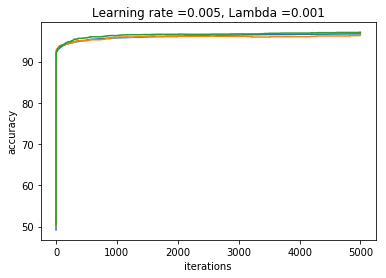

In [897]:
accuracy_train_L1_red = np.squeeze(np.array(accuracy_train_L1)[1,:])
accuracy_val_L1_red = np.squeeze(np.array(accuracy_val_L1)[1,:])
accuracy_test_L1_red = np.squeeze(np.array(accuracy_test_L1)[1,:])

plt.plot(accuracy_train_L1_red)
plt.plot(accuracy_val_L1_red)
plt.plot(accuracy_test_L1_red)
plt.ylabel('accuracy')
plt.xlabel('iterations')
plt.title("Learning rate =" + str(d["learning_rate"]) + ", " + "Lambda =" + str(0.001))
plt.show()

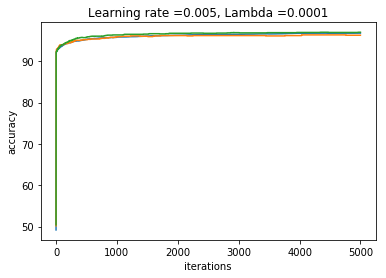

In [898]:
accuracy_train_L1_red = np.squeeze(np.array(accuracy_train_L1)[2,:])
accuracy_val_L1_red = np.squeeze(np.array(accuracy_val_L1)[2,:])
accuracy_test_L1_red = np.squeeze(np.array(accuracy_test_L1)[2,:])

plt.plot(accuracy_train_L1_red)
plt.plot(accuracy_val_L1_red)
plt.plot(accuracy_test_L1_red)
plt.ylabel('accuracy')
plt.xlabel('iterations')
plt.title("Learning rate =" + str(d["learning_rate"]) + ", " + "Lambda =" + str(0.0001))
plt.show()

We now plot the final test accuracy with different regularizations.

In [914]:
print(np.array(final_test_set_accuracy_L1).shape)

(3,)


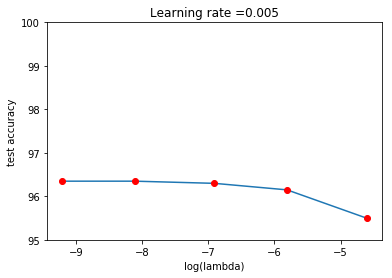

In [17]:
plt.plot(np.squeeze(np.log(np.array([0.01, 0.003, 0.001, 0.0003, 0.0001]).reshape(1,5))),np.squeeze(np.array(final_test_set_accuracy_L1[6:11]).reshape(1,5)), np.squeeze(np.log(np.array([0.01, 0.003, 0.001, 0.0003, 0.0001]).reshape(1,5))),np.squeeze(np.array(final_test_set_accuracy_L1[6:11]).reshape(1,5)), 'or')
plt.ylabel('test accuracy')
plt.ylim((95,100))
plt.xlabel('log(lambda)')
plt.title("Learning rate =" + str(0.005))
plt.show()

(784, 1)


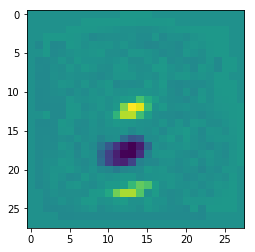

In [966]:
w = np.array(w_L1_lambda[4])
print(w.shape)
plt.imshow(w.reshape([28,28]))

(784, 1)


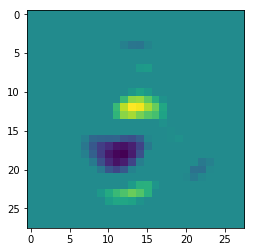

In [967]:
w = np.array(w_L1_lambda[6])
print(w.shape)
plt.imshow(w.reshape([28,28]))

(784, 1)


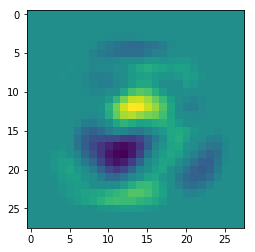

In [968]:
w = np.array(w_L1_lambda[8])
print(w.shape)
plt.imshow(w.reshape([28,28]))

(784, 1)


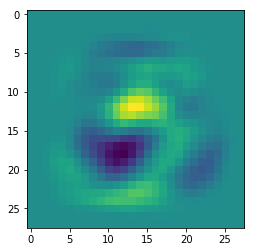

In [969]:
w = np.array(w_L1_lambda[10])
print(w.shape)
plt.imshow(w.reshape([28,28]))

## Reality Check on L2 Norm

In [18]:
lambda_cand = [100, 10, 1, 0.3, 0.1, 0.03, 0.01, 0.003, 0.001, 0.0003, 0.0001]
norm_len = []
accuracy_train_L2 = []
accuracy_val_L2 = []
accuracy_test_L2 = []
final_test_set_accuracy_L2 = []
w_L2_lambda = []

for i in range(0,11):
    d = model(train_set_x, train_set_y, validation_set_x, validation_set_y, test_set_x, test_set_y, lambda_reg = lambda_cand[i], reg_type = 2, num_iterations = 5000, learning_rate = 0.005, print_cost = False, early_stopping = True)
    w = d["w"]
    w_L2_lambda.append(w)
    accuracy_train_L2.append(d["Y_prediction_train_early"])
    accuracy_val_L2.append(d["Y_prediction_val_early"])
    accuracy_test_L2.append(d["Y_prediction_test_early"])
    norm_len.append(np.sum(np.abs(w), keepdims=True))
    final_test_set_accuracy_L2.append(d["final_test_accuracy"])

Training cost after iteration 0: 0.693147
Validation cost after iteration 0: 0.693147
Test cost after iteration 0: 0.693147
Training cost after iteration 200: 0.688594
Validation cost after iteration 200: 0.688581
Test cost after iteration 200: 0.688463
Training cost after iteration 400: 0.688584
Validation cost after iteration 400: 0.688536
Test cost after iteration 400: 0.688423
Training cost after iteration 600: 0.688578
Validation cost after iteration 600: 0.688501
Test cost after iteration 600: 0.688392
Training cost after iteration 800: 0.688574
Validation cost after iteration 800: 0.688474
Test cost after iteration 800: 0.688368
Training cost after iteration 1000: 0.688571
Validation cost after iteration 1000: 0.688453
Test cost after iteration 1000: 0.688350
Training cost after iteration 1200: 0.688570
Validation cost after iteration 1200: 0.688437
Test cost after iteration 1200: 0.688336
Training cost after iteration 1400: 0.688569
Validation cost after iteration 1400: 0.68842

Training cost after iteration 2200: 0.481589
Validation cost after iteration 2200: 0.481902
Test cost after iteration 2200: 0.477557
Training cost after iteration 2400: 0.481551
Validation cost after iteration 2400: 0.481845
Test cost after iteration 2400: 0.477498
Training cost after iteration 2600: 0.481516
Validation cost after iteration 2600: 0.481791
Test cost after iteration 2600: 0.477443
Training cost after iteration 2800: 0.481482
Validation cost after iteration 2800: 0.481740
Test cost after iteration 2800: 0.477390
Training cost after iteration 3000: 0.481450
Validation cost after iteration 3000: 0.481691
Test cost after iteration 3000: 0.477339
Training cost after iteration 3200: 0.481420
Validation cost after iteration 3200: 0.481644
Test cost after iteration 3200: 0.477291
Training cost after iteration 3400: 0.481392
Validation cost after iteration 3400: 0.481599
Test cost after iteration 3400: 0.477244
Training cost after iteration 3600: 0.481365
Validation cost after it

Training cost after iteration 4400: 0.254348
Validation cost after iteration 4400: 0.255057
Test cost after iteration 4400: 0.247467
Training cost after iteration 4600: 0.254316
Validation cost after iteration 4600: 0.255021
Test cost after iteration 4600: 0.247423
Training cost after iteration 4800: 0.254285
Validation cost after iteration 4800: 0.254985
Test cost after iteration 4800: 0.247381
train accuracy: 96.17954267432013 %
Hold-out validation set accuracy: 95.9322033898305 %
test accuracy: 96.1480740370185 %
Training cost after iteration 0: 0.693147
Validation cost after iteration 0: 0.693147
Test cost after iteration 0: 0.693147
Training cost after iteration 200: 0.334211
Validation cost after iteration 200: 0.334131
Test cost after iteration 200: 0.330431
Training cost after iteration 400: 0.259957
Validation cost after iteration 400: 0.259768
Test cost after iteration 400: 0.255379
Training cost after iteration 600: 0.229577
Validation cost after iteration 600: 0.229327
Test

Training cost after iteration 1400: 0.158078
Validation cost after iteration 1400: 0.157624
Test cost after iteration 1400: 0.151557
Training cost after iteration 1600: 0.152230
Validation cost after iteration 1600: 0.151812
Test cost after iteration 1600: 0.145450
Training cost after iteration 1800: 0.147498
Validation cost after iteration 1800: 0.147125
Test cost after iteration 1800: 0.140481
Training cost after iteration 2000: 0.143579
Validation cost after iteration 2000: 0.143259
Test cost after iteration 2000: 0.136348
Training cost after iteration 2200: 0.140275
Validation cost after iteration 2200: 0.140013
Test cost after iteration 2200: 0.132847
Training cost after iteration 2400: 0.137446
Validation cost after iteration 2400: 0.137247
Test cost after iteration 2400: 0.129838
Training cost after iteration 2600: 0.134995
Validation cost after iteration 2600: 0.134859
Test cost after iteration 2600: 0.127221
Training cost after iteration 2800: 0.132848
Validation cost after it

Training cost after iteration 3600: 0.119360
Validation cost after iteration 3600: 0.119514
Test cost after iteration 3600: 0.110851
Training cost after iteration 3800: 0.117906
Validation cost after iteration 3800: 0.118127
Test cost after iteration 3800: 0.109284
Training cost after iteration 4000: 0.116569
Validation cost after iteration 4000: 0.116855
Test cost after iteration 4000: 0.107840
Training cost after iteration 4200: 0.115333
Validation cost after iteration 4200: 0.115684
Test cost after iteration 4200: 0.106505
Training cost after iteration 4400: 0.114187
Validation cost after iteration 4400: 0.114602
Test cost after iteration 4400: 0.105265
Training cost after iteration 4600: 0.113120
Validation cost after iteration 4600: 0.113597
Test cost after iteration 4600: 0.104111
Training cost after iteration 4800: 0.112124
Validation cost after iteration 4800: 0.112662
Test cost after iteration 4800: 0.103031
train accuracy: 96.56535240425332 %
Hold-out validation set accuracy:

In [886]:
print(norm_len)

[array([[ 32.94962508]]), array([[ 32.63050505]]), array([[ 29.7950313]])]


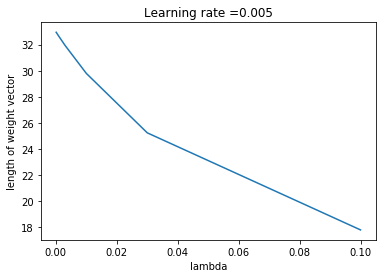

In [977]:
plt.plot(np.squeeze(np.array([0.1, 0.03, 0.01, 0.003, 0.001, 0.0003, 0.0001]).reshape(1,7)),np.squeeze(np.array(norm_len[4:11]).reshape(1,7)))
plt.ylabel('length of weight vector')
plt.xlabel('lambda')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

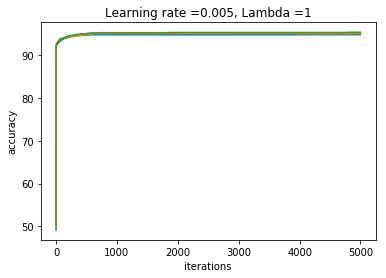

In [1010]:
accuracy_train_L2_red = np.squeeze(np.array(accuracy_train_L2)[2])
accuracy_val_L2_red = np.squeeze(np.array(accuracy_val_L2)[2])
accuracy_test_L2_red = np.squeeze(np.array(accuracy_test_L2)[2])

plt.plot(accuracy_train_L2_red)
plt.plot(accuracy_val_L2_red)
plt.plot(accuracy_test_L2_red)
plt.ylabel('accuracy')
plt.xlabel('iterations')
plt.title("Learning rate =" + str(0.005) + ", " + "Lambda =" + str(1))
plt.show()

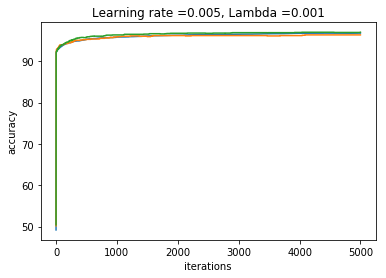

In [907]:
accuracy_train_L2_red = np.squeeze(np.array(accuracy_train_L2)[1,:])
accuracy_val_L2_red = np.squeeze(np.array(accuracy_val_L2)[1,:])
accuracy_test_L2_red = np.squeeze(np.array(accuracy_test_L2)[1,:])

plt.plot(accuracy_train_L2_red)
plt.plot(accuracy_val_L2_red)
plt.plot(accuracy_test_L2_red)
plt.ylabel('accuracy')
plt.xlabel('iterations')
plt.title("Learning rate =" + str(d["learning_rate"]) + ", " + "Lambda =" + str(0.001))
plt.show()

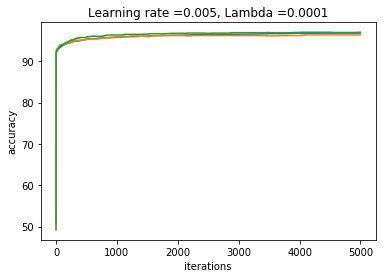

In [908]:
accuracy_train_L2_red = np.squeeze(np.array(accuracy_train_L2)[0,:])
accuracy_val_L2_red = np.squeeze(np.array(accuracy_val_L2)[0,:])
accuracy_test_L2_red = np.squeeze(np.array(accuracy_test_L2)[0,:])

plt.plot(accuracy_train_L2_red)
plt.plot(accuracy_val_L2_red)
plt.plot(accuracy_test_L2_red)
plt.ylabel('accuracy')
plt.xlabel('iterations')
plt.title("Learning rate =" + str(d["learning_rate"]) + ", " + "Lambda =" + str(0.0001))
plt.show()

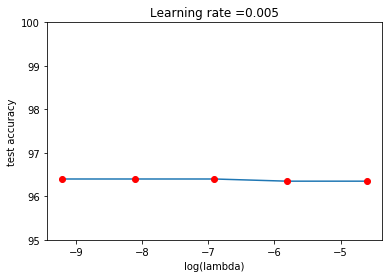

In [19]:
plt.plot(np.squeeze(np.log(np.array([0.01, 0.003, 0.001, 0.0003, 0.0001]).reshape(1,5))),np.squeeze(np.array(final_test_set_accuracy_L2[6:11]).reshape(1,5)), np.squeeze(np.log(np.array([0.01, 0.003, 0.001, 0.0003, 0.0001]).reshape(1,5))),np.squeeze(np.array(final_test_set_accuracy_L2[6:11]).reshape(1,5)), 'or')
plt.ylabel('test accuracy')
plt.ylim((95,100))
plt.xlabel('log(lambda)')
plt.title("Learning rate =" + str(0.005))
plt.show()

(784, 1)


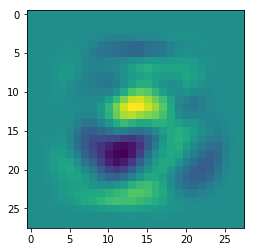

In [1017]:
w = np.array(w_L2_lambda[8])
print(w.shape)
plt.imshow(w.reshape([28,28]))

(784, 1)


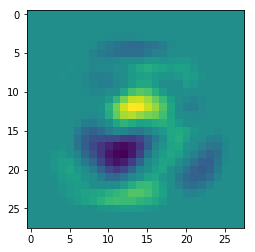

In [927]:
w = np.array(w_L1_lambda[1])
print(w.shape)
plt.imshow(w.reshape([28,28]))

(784, 1)


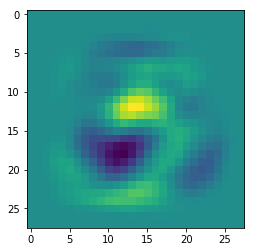

In [928]:
w = np.array(w_L1_lambda[2])
print(w.shape)
plt.imshow(w.reshape([28,28]))

## Early-Stopping

If the error on the hold-out set begins to go up consistently over, say, 3 epochs, use the weights with the minimum error on the hold-out set as our final answer.

In [837]:
d = model(train_set_x, train_set_y, validation_set_x, validation_set_y, test_set_x, test_set_y, lambda_reg = 0, reg_type = 2, num_iterations = 5000, learning_rate = 0.005, print_cost = True, early_stopping = True)

Training cost after iteration 0: 0.693147
Validation cost after iteration 0: 0.693147
Test cost after iteration 0: 0.693147
stopped!
Training cost after iteration 200: 0.328802
Validation cost after iteration 200: 0.320982
Test cost after iteration 200: 0.325073
Training cost after iteration 400: 0.245979
Validation cost after iteration 400: 0.235853
Test cost after iteration 400: 0.241249
Training cost after iteration 600: 0.209049
Validation cost after iteration 600: 0.197751
Test cost after iteration 600: 0.203659
Training cost after iteration 800: 0.187569
Validation cost after iteration 800: 0.175513
Test cost after iteration 800: 0.181655
Training cost after iteration 1000: 0.173271
Validation cost after iteration 1000: 0.160657
Test cost after iteration 1000: 0.166914
Training cost after iteration 1200: 0.162945
Validation cost after iteration 1200: 0.149889
Test cost after iteration 1200: 0.156202
Training cost after iteration 1400: 0.155071
Validation cost after iteration 1400

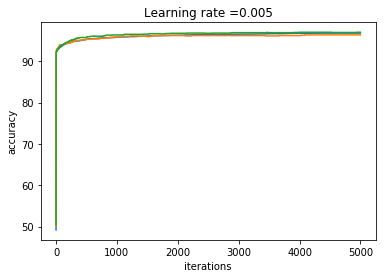

In [849]:
train_accuracy = np.squeeze(d['Y_prediction_train_early'])
val_accuracy = np.squeeze(d['Y_prediction_val_early'])
test_accuracy = np.squeeze(d['Y_prediction_test_early'])
plt.plot(train_accuracy)
plt.plot(val_accuracy)
plt.plot(test_accuracy)
plt.ylabel('accuracy')
plt.xlabel('iterations')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

## Mini-Batch Gradient Descent

Previously we use Batch Gradient Descent to learn the parameters. To speed up learning, we can use mini-batch gradient descent where each mini-batch is roughly 10% of the training set.

In [819]:
def mb_model(X_train, Y_train, X_val, Y_val, X_test, Y_test, lambda_reg, reg_type, batch_size, num_epoch, learning_rate, T = 2, print_cost = True, weight_decay = False):
    """
    Builds the logistic regression model by calling the function you've implemented previously

    """
    costs_mb = []
    val_costs_mb = []
    test_costs_mb = []
    w, b = np.zeros((X_train.shape[0],1)), 0.
    
    for i in range(0,num_epoch):
        if weight_decay == True:
            learning_rate = learning_rate / (1 + i / T)
        for j in range(0,train_set_x.shape[1]-batch_size+1,batch_size):
            parameters, grads, costs, val_costs, test_costs, prediction_accuracy_early_train, prediction_accuracy_early_val, prediction_accuracy_early_test = optimize(w, b, X_train, Y_train, X_val, Y_val, X_test, Y_test, lambda_reg, reg_type, 1, learning_rate, print_cost = True, early_stopping = False)
            w = parameters["w"]
            b = parameters["b"]
            costs_mb.append(costs)
            val_costs_mb.append(val_costs)
            test_costs_mb.append(test_costs)
    
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)
    Y_prediction_val = predict(w, b, X_val)

    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("Hold-out validation set accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_val - Y_val)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs_mb,
         "val_costs": val_costs_mb,
         "test_costs": test_costs_mb,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train,
         "Y_prediction_val": Y_prediction_val,
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate}
    
    return d

In [807]:
print(train_set_x.shape[1])

10627


In [850]:
d = mb_model(train_set_x, train_set_y, validation_set_x, validation_set_y, test_set_x, test_set_y, lambda_reg = 0, reg_type = 2, batch_size = int(0.1*train_set_x.shape[1]), num_epoch = 500, learning_rate = 0.005, T = 2, print_cost = True, weight_decay = False)

Training cost after iteration 0: 0.693147
Validation cost after iteration 0: 0.693147
Test cost after iteration 0: 0.693147
Training cost after iteration 0: 0.687141
Validation cost after iteration 0: 0.687087
Test cost after iteration 0: 0.687045
Training cost after iteration 0: 0.681238
Validation cost after iteration 0: 0.681131
Test cost after iteration 0: 0.681046
Training cost after iteration 0: 0.675435
Validation cost after iteration 0: 0.675276
Test cost after iteration 0: 0.675148
Training cost after iteration 0: 0.669730
Validation cost after iteration 0: 0.669520
Test cost after iteration 0: 0.669350
Training cost after iteration 0: 0.664121
Validation cost after iteration 0: 0.663861
Test cost after iteration 0: 0.663649
Training cost after iteration 0: 0.658607
Validation cost after iteration 0: 0.658298
Test cost after iteration 0: 0.658044
Training cost after iteration 0: 0.653186
Validation cost after iteration 0: 0.652829
Test cost after iteration 0: 0.652533
Training

Training cost after iteration 0: 0.420813
Validation cost after iteration 0: 0.419375
Test cost after iteration 0: 0.416390
Training cost after iteration 0: 0.418954
Validation cost after iteration 0: 0.417520
Test cost after iteration 0: 0.414503
Training cost after iteration 0: 0.417117
Validation cost after iteration 0: 0.415689
Test cost after iteration 0: 0.412640
Training cost after iteration 0: 0.415303
Validation cost after iteration 0: 0.413879
Test cost after iteration 0: 0.410798
Training cost after iteration 0: 0.413510
Validation cost after iteration 0: 0.412092
Test cost after iteration 0: 0.408979
Training cost after iteration 0: 0.411738
Validation cost after iteration 0: 0.410326
Test cost after iteration 0: 0.407181
Training cost after iteration 0: 0.409988
Validation cost after iteration 0: 0.408581
Test cost after iteration 0: 0.405404
Training cost after iteration 0: 0.408258
Validation cost after iteration 0: 0.406857
Test cost after iteration 0: 0.403649
Training

Training cost after iteration 0: 0.329380
Validation cost after iteration 0: 0.328594
Test cost after iteration 0: 0.323609
Training cost after iteration 0: 0.328473
Validation cost after iteration 0: 0.327698
Test cost after iteration 0: 0.322688
Training cost after iteration 0: 0.327574
Validation cost after iteration 0: 0.326811
Test cost after iteration 0: 0.321776
Training cost after iteration 0: 0.326683
Validation cost after iteration 0: 0.325931
Test cost after iteration 0: 0.320871
Training cost after iteration 0: 0.325800
Validation cost after iteration 0: 0.325059
Test cost after iteration 0: 0.319974
Training cost after iteration 0: 0.324923
Validation cost after iteration 0: 0.324194
Test cost after iteration 0: 0.319084
Training cost after iteration 0: 0.324055
Validation cost after iteration 0: 0.323337
Test cost after iteration 0: 0.318202
Training cost after iteration 0: 0.323193
Validation cost after iteration 0: 0.322487
Test cost after iteration 0: 0.317327
Training

Training cost after iteration 0: 0.275691
Validation cost after iteration 0: 0.275792
Test cost after iteration 0: 0.269035
Training cost after iteration 0: 0.275184
Validation cost after iteration 0: 0.275296
Test cost after iteration 0: 0.268519
Training cost after iteration 0: 0.274680
Validation cost after iteration 0: 0.274803
Test cost after iteration 0: 0.268006
Training cost after iteration 0: 0.274180
Validation cost after iteration 0: 0.274313
Test cost after iteration 0: 0.267496
Training cost after iteration 0: 0.273682
Validation cost after iteration 0: 0.273827
Test cost after iteration 0: 0.266990
Training cost after iteration 0: 0.273188
Validation cost after iteration 0: 0.273343
Test cost after iteration 0: 0.266486
Training cost after iteration 0: 0.272697
Validation cost after iteration 0: 0.272862
Test cost after iteration 0: 0.265986
Training cost after iteration 0: 0.272209
Validation cost after iteration 0: 0.272385
Test cost after iteration 0: 0.265489
Training

Training cost after iteration 0: 0.247536
Validation cost after iteration 0: 0.248308
Test cost after iteration 0: 0.240323
Training cost after iteration 0: 0.247189
Validation cost after iteration 0: 0.247970
Test cost after iteration 0: 0.239969
Training cost after iteration 0: 0.246844
Validation cost after iteration 0: 0.247634
Test cost after iteration 0: 0.239616
Training cost after iteration 0: 0.246500
Validation cost after iteration 0: 0.247300
Test cost after iteration 0: 0.239265
Training cost after iteration 0: 0.246159
Validation cost after iteration 0: 0.246967
Test cost after iteration 0: 0.238916
Training cost after iteration 0: 0.245819
Validation cost after iteration 0: 0.246636
Test cost after iteration 0: 0.238568
Training cost after iteration 0: 0.245480
Validation cost after iteration 0: 0.246307
Test cost after iteration 0: 0.238222
Training cost after iteration 0: 0.245144
Validation cost after iteration 0: 0.245979
Test cost after iteration 0: 0.237878
Training

Training cost after iteration 0: 0.226838
Validation cost after iteration 0: 0.228212
Test cost after iteration 0: 0.219145
Training cost after iteration 0: 0.226586
Validation cost after iteration 0: 0.227969
Test cost after iteration 0: 0.218888
Training cost after iteration 0: 0.226336
Validation cost after iteration 0: 0.227727
Test cost after iteration 0: 0.218632
Training cost after iteration 0: 0.226087
Validation cost after iteration 0: 0.227486
Test cost after iteration 0: 0.218376
Training cost after iteration 0: 0.225839
Validation cost after iteration 0: 0.227246
Test cost after iteration 0: 0.218122
Training cost after iteration 0: 0.225592
Validation cost after iteration 0: 0.227007
Test cost after iteration 0: 0.217869
Training cost after iteration 0: 0.225346
Validation cost after iteration 0: 0.226769
Test cost after iteration 0: 0.217617
Training cost after iteration 0: 0.225101
Validation cost after iteration 0: 0.226532
Test cost after iteration 0: 0.217366
Training

Training cost after iteration 0: 0.211274
Validation cost after iteration 0: 0.213176
Test cost after iteration 0: 0.203172
Training cost after iteration 0: 0.211083
Validation cost after iteration 0: 0.212992
Test cost after iteration 0: 0.202976
Training cost after iteration 0: 0.210893
Validation cost after iteration 0: 0.212809
Test cost after iteration 0: 0.202780
Training cost after iteration 0: 0.210703
Validation cost after iteration 0: 0.212626
Test cost after iteration 0: 0.202585
Training cost after iteration 0: 0.210515
Validation cost after iteration 0: 0.212444
Test cost after iteration 0: 0.202391
Training cost after iteration 0: 0.210327
Validation cost after iteration 0: 0.212263
Test cost after iteration 0: 0.202198
Training cost after iteration 0: 0.210139
Validation cost after iteration 0: 0.212082
Test cost after iteration 0: 0.202005
Training cost after iteration 0: 0.209952
Validation cost after iteration 0: 0.211902
Test cost after iteration 0: 0.201813
Training

Training cost after iteration 0: 0.199371
Validation cost after iteration 0: 0.201725
Test cost after iteration 0: 0.190922
Training cost after iteration 0: 0.199220
Validation cost after iteration 0: 0.201579
Test cost after iteration 0: 0.190766
Training cost after iteration 0: 0.199069
Validation cost after iteration 0: 0.201435
Test cost after iteration 0: 0.190611
Training cost after iteration 0: 0.198919
Validation cost after iteration 0: 0.201290
Test cost after iteration 0: 0.190456
Training cost after iteration 0: 0.198769
Validation cost after iteration 0: 0.201147
Test cost after iteration 0: 0.190302
Training cost after iteration 0: 0.198620
Validation cost after iteration 0: 0.201003
Test cost after iteration 0: 0.190148
Training cost after iteration 0: 0.198471
Validation cost after iteration 0: 0.200860
Test cost after iteration 0: 0.189995
Training cost after iteration 0: 0.198322
Validation cost after iteration 0: 0.200718
Test cost after iteration 0: 0.189842
Training

Training cost after iteration 0: 0.189191
Validation cost after iteration 0: 0.191969
Test cost after iteration 0: 0.180421
Training cost after iteration 0: 0.189069
Validation cost after iteration 0: 0.191852
Test cost after iteration 0: 0.180296
Training cost after iteration 0: 0.188948
Validation cost after iteration 0: 0.191736
Test cost after iteration 0: 0.180170
Training cost after iteration 0: 0.188827
Validation cost after iteration 0: 0.191621
Test cost after iteration 0: 0.180045
Training cost after iteration 0: 0.188706
Validation cost after iteration 0: 0.191505
Test cost after iteration 0: 0.179921
Training cost after iteration 0: 0.188586
Validation cost after iteration 0: 0.191390
Test cost after iteration 0: 0.179797
Training cost after iteration 0: 0.188466
Validation cost after iteration 0: 0.191276
Test cost after iteration 0: 0.179673
Training cost after iteration 0: 0.188346
Validation cost after iteration 0: 0.191161
Test cost after iteration 0: 0.179549
Training

Training cost after iteration 0: 0.181097
Validation cost after iteration 0: 0.184241
Test cost after iteration 0: 0.172057
Training cost after iteration 0: 0.180997
Validation cost after iteration 0: 0.184144
Test cost after iteration 0: 0.171953
Training cost after iteration 0: 0.180896
Validation cost after iteration 0: 0.184049
Test cost after iteration 0: 0.171849
Training cost after iteration 0: 0.180796
Validation cost after iteration 0: 0.183953
Test cost after iteration 0: 0.171745
Training cost after iteration 0: 0.180695
Validation cost after iteration 0: 0.183857
Test cost after iteration 0: 0.171641
Training cost after iteration 0: 0.180596
Validation cost after iteration 0: 0.183762
Test cost after iteration 0: 0.171538
Training cost after iteration 0: 0.180496
Validation cost after iteration 0: 0.183667
Test cost after iteration 0: 0.171435
Training cost after iteration 0: 0.180396
Validation cost after iteration 0: 0.183572
Test cost after iteration 0: 0.171332
Training

Training cost after iteration 0: 0.174150
Validation cost after iteration 0: 0.177628
Test cost after iteration 0: 0.164866
Training cost after iteration 0: 0.174065
Validation cost after iteration 0: 0.177547
Test cost after iteration 0: 0.164778
Training cost after iteration 0: 0.173980
Validation cost after iteration 0: 0.177467
Test cost after iteration 0: 0.164690
Training cost after iteration 0: 0.173896
Validation cost after iteration 0: 0.177386
Test cost after iteration 0: 0.164602
Training cost after iteration 0: 0.173811
Validation cost after iteration 0: 0.177306
Test cost after iteration 0: 0.164515
Training cost after iteration 0: 0.173727
Validation cost after iteration 0: 0.177226
Test cost after iteration 0: 0.164428
Training cost after iteration 0: 0.173643
Validation cost after iteration 0: 0.177147
Test cost after iteration 0: 0.164341
Training cost after iteration 0: 0.173559
Validation cost after iteration 0: 0.177067
Test cost after iteration 0: 0.164254
Training

Training cost after iteration 0: 0.168179
Validation cost after iteration 0: 0.171963
Test cost after iteration 0: 0.158678
Training cost after iteration 0: 0.168106
Validation cost after iteration 0: 0.171894
Test cost after iteration 0: 0.158603
Training cost after iteration 0: 0.168034
Validation cost after iteration 0: 0.171825
Test cost after iteration 0: 0.158528
Training cost after iteration 0: 0.167962
Validation cost after iteration 0: 0.171757
Test cost after iteration 0: 0.158453
Training cost after iteration 0: 0.167889
Validation cost after iteration 0: 0.171689
Test cost after iteration 0: 0.158378
Training cost after iteration 0: 0.167817
Validation cost after iteration 0: 0.171620
Test cost after iteration 0: 0.158304
Training cost after iteration 0: 0.167746
Validation cost after iteration 0: 0.171552
Test cost after iteration 0: 0.158229
Training cost after iteration 0: 0.167674
Validation cost after iteration 0: 0.171484
Test cost after iteration 0: 0.158155
Training

Training cost after iteration 0: 0.163167
Validation cost after iteration 0: 0.167222
Test cost after iteration 0: 0.153481
Training cost after iteration 0: 0.163104
Validation cost after iteration 0: 0.167162
Test cost after iteration 0: 0.153415
Training cost after iteration 0: 0.163041
Validation cost after iteration 0: 0.167102
Test cost after iteration 0: 0.153350
Training cost after iteration 0: 0.162978
Validation cost after iteration 0: 0.167043
Test cost after iteration 0: 0.153285
Training cost after iteration 0: 0.162916
Validation cost after iteration 0: 0.166984
Test cost after iteration 0: 0.153220
Training cost after iteration 0: 0.162853
Validation cost after iteration 0: 0.166925
Test cost after iteration 0: 0.153155
Training cost after iteration 0: 0.162790
Validation cost after iteration 0: 0.166865
Test cost after iteration 0: 0.153090
Training cost after iteration 0: 0.162728
Validation cost after iteration 0: 0.166807
Test cost after iteration 0: 0.153025
Training

Training cost after iteration 0: 0.158896
Validation cost after iteration 0: 0.163191
Test cost after iteration 0: 0.149048
Training cost after iteration 0: 0.158840
Validation cost after iteration 0: 0.163139
Test cost after iteration 0: 0.148990
Training cost after iteration 0: 0.158784
Validation cost after iteration 0: 0.163086
Test cost after iteration 0: 0.148933
Training cost after iteration 0: 0.158729
Validation cost after iteration 0: 0.163034
Test cost after iteration 0: 0.148875
Training cost after iteration 0: 0.158674
Validation cost after iteration 0: 0.162982
Test cost after iteration 0: 0.148817
Training cost after iteration 0: 0.158618
Validation cost after iteration 0: 0.162930
Test cost after iteration 0: 0.148760
Training cost after iteration 0: 0.158563
Validation cost after iteration 0: 0.162877
Test cost after iteration 0: 0.148703
Training cost after iteration 0: 0.158508
Validation cost after iteration 0: 0.162826
Test cost after iteration 0: 0.148646
Training

Training cost after iteration 0: 0.155158
Validation cost after iteration 0: 0.159673
Test cost after iteration 0: 0.145169
Training cost after iteration 0: 0.155109
Validation cost after iteration 0: 0.159627
Test cost after iteration 0: 0.145117
Training cost after iteration 0: 0.155059
Validation cost after iteration 0: 0.159580
Test cost after iteration 0: 0.145066
Training cost after iteration 0: 0.155010
Validation cost after iteration 0: 0.159534
Test cost after iteration 0: 0.145014
Training cost after iteration 0: 0.154960
Validation cost after iteration 0: 0.159487
Test cost after iteration 0: 0.144963
Training cost after iteration 0: 0.154911
Validation cost after iteration 0: 0.159441
Test cost after iteration 0: 0.144912
Training cost after iteration 0: 0.154861
Validation cost after iteration 0: 0.159394
Test cost after iteration 0: 0.144860
Training cost after iteration 0: 0.154812
Validation cost after iteration 0: 0.159348
Test cost after iteration 0: 0.144809
Training

Training cost after iteration 0: 0.151767
Validation cost after iteration 0: 0.156489
Test cost after iteration 0: 0.141648
Training cost after iteration 0: 0.151723
Validation cost after iteration 0: 0.156447
Test cost after iteration 0: 0.141602
Training cost after iteration 0: 0.151678
Validation cost after iteration 0: 0.156406
Test cost after iteration 0: 0.141555
Training cost after iteration 0: 0.151634
Validation cost after iteration 0: 0.156364
Test cost after iteration 0: 0.141509
Training cost after iteration 0: 0.151589
Validation cost after iteration 0: 0.156322
Test cost after iteration 0: 0.141463
Training cost after iteration 0: 0.151545
Validation cost after iteration 0: 0.156281
Test cost after iteration 0: 0.141417
Training cost after iteration 0: 0.151501
Validation cost after iteration 0: 0.156239
Test cost after iteration 0: 0.141371
Training cost after iteration 0: 0.151456
Validation cost after iteration 0: 0.156198
Test cost after iteration 0: 0.141325
Training

Training cost after iteration 0: 0.148712
Validation cost after iteration 0: 0.153628
Test cost after iteration 0: 0.138477
Training cost after iteration 0: 0.148672
Validation cost after iteration 0: 0.153590
Test cost after iteration 0: 0.138435
Training cost after iteration 0: 0.148632
Validation cost after iteration 0: 0.153552
Test cost after iteration 0: 0.138393
Training cost after iteration 0: 0.148592
Validation cost after iteration 0: 0.153515
Test cost after iteration 0: 0.138351
Training cost after iteration 0: 0.148551
Validation cost after iteration 0: 0.153477
Test cost after iteration 0: 0.138310
Training cost after iteration 0: 0.148511
Validation cost after iteration 0: 0.153439
Test cost after iteration 0: 0.138268
Training cost after iteration 0: 0.148471
Validation cost after iteration 0: 0.153402
Test cost after iteration 0: 0.138227
Training cost after iteration 0: 0.148431
Validation cost after iteration 0: 0.153365
Test cost after iteration 0: 0.138185
Training

Training cost after iteration 0: 0.145796
Validation cost after iteration 0: 0.150902
Test cost after iteration 0: 0.135450
Training cost after iteration 0: 0.145760
Validation cost after iteration 0: 0.150868
Test cost after iteration 0: 0.135412
Training cost after iteration 0: 0.145723
Validation cost after iteration 0: 0.150834
Test cost after iteration 0: 0.135374
Training cost after iteration 0: 0.145687
Validation cost after iteration 0: 0.150800
Test cost after iteration 0: 0.135337
Training cost after iteration 0: 0.145651
Validation cost after iteration 0: 0.150766
Test cost after iteration 0: 0.135299
Training cost after iteration 0: 0.145614
Validation cost after iteration 0: 0.150732
Test cost after iteration 0: 0.135261
Training cost after iteration 0: 0.145578
Validation cost after iteration 0: 0.150698
Test cost after iteration 0: 0.135224
Training cost after iteration 0: 0.145542
Validation cost after iteration 0: 0.150665
Test cost after iteration 0: 0.135186
Training

Training cost after iteration 0: 0.143216
Validation cost after iteration 0: 0.148496
Test cost after iteration 0: 0.132773
Training cost after iteration 0: 0.143183
Validation cost after iteration 0: 0.148465
Test cost after iteration 0: 0.132738
Training cost after iteration 0: 0.143149
Validation cost after iteration 0: 0.148434
Test cost after iteration 0: 0.132704
Training cost after iteration 0: 0.143116
Validation cost after iteration 0: 0.148403
Test cost after iteration 0: 0.132669
Training cost after iteration 0: 0.143083
Validation cost after iteration 0: 0.148372
Test cost after iteration 0: 0.132635
Training cost after iteration 0: 0.143050
Validation cost after iteration 0: 0.148342
Test cost after iteration 0: 0.132600
Training cost after iteration 0: 0.143017
Validation cost after iteration 0: 0.148311
Test cost after iteration 0: 0.132566
Training cost after iteration 0: 0.142984
Validation cost after iteration 0: 0.148280
Test cost after iteration 0: 0.132532
Training

Training cost after iteration 0: 0.140825
Validation cost after iteration 0: 0.146272
Test cost after iteration 0: 0.130293
Training cost after iteration 0: 0.140794
Validation cost after iteration 0: 0.146243
Test cost after iteration 0: 0.130261
Training cost after iteration 0: 0.140764
Validation cost after iteration 0: 0.146215
Test cost after iteration 0: 0.130229
Training cost after iteration 0: 0.140734
Validation cost after iteration 0: 0.146187
Test cost after iteration 0: 0.130198
Training cost after iteration 0: 0.140703
Validation cost after iteration 0: 0.146158
Test cost after iteration 0: 0.130166
Training cost after iteration 0: 0.140673
Validation cost after iteration 0: 0.146130
Test cost after iteration 0: 0.130135
Training cost after iteration 0: 0.140642
Validation cost after iteration 0: 0.146102
Test cost after iteration 0: 0.130103
Training cost after iteration 0: 0.140612
Validation cost after iteration 0: 0.146074
Test cost after iteration 0: 0.130072
Training

Training cost after iteration 0: 0.138657
Validation cost after iteration 0: 0.144259
Test cost after iteration 0: 0.128045
Training cost after iteration 0: 0.138629
Validation cost after iteration 0: 0.144233
Test cost after iteration 0: 0.128016
Training cost after iteration 0: 0.138601
Validation cost after iteration 0: 0.144207
Test cost after iteration 0: 0.127987
Training cost after iteration 0: 0.138573
Validation cost after iteration 0: 0.144181
Test cost after iteration 0: 0.127958
Training cost after iteration 0: 0.138545
Validation cost after iteration 0: 0.144155
Test cost after iteration 0: 0.127929
Training cost after iteration 0: 0.138517
Validation cost after iteration 0: 0.144129
Test cost after iteration 0: 0.127900
Training cost after iteration 0: 0.138489
Validation cost after iteration 0: 0.144103
Test cost after iteration 0: 0.127871
Training cost after iteration 0: 0.138461
Validation cost after iteration 0: 0.144077
Test cost after iteration 0: 0.127842
Training

Training cost after iteration 0: 0.136656
Validation cost after iteration 0: 0.142405
Test cost after iteration 0: 0.125972
Training cost after iteration 0: 0.136630
Validation cost after iteration 0: 0.142381
Test cost after iteration 0: 0.125945
Training cost after iteration 0: 0.136604
Validation cost after iteration 0: 0.142357
Test cost after iteration 0: 0.125918
Training cost after iteration 0: 0.136578
Validation cost after iteration 0: 0.142333
Test cost after iteration 0: 0.125891
Training cost after iteration 0: 0.136552
Validation cost after iteration 0: 0.142309
Test cost after iteration 0: 0.125864
Training cost after iteration 0: 0.136526
Validation cost after iteration 0: 0.142285
Test cost after iteration 0: 0.125837
Training cost after iteration 0: 0.136500
Validation cost after iteration 0: 0.142261
Test cost after iteration 0: 0.125811
Training cost after iteration 0: 0.136474
Validation cost after iteration 0: 0.142237
Test cost after iteration 0: 0.125784
Training

Validation cost after iteration 0: 0.140690
Test cost after iteration 0: 0.124050
Training cost after iteration 0: 0.134776
Validation cost after iteration 0: 0.140667
Test cost after iteration 0: 0.124025
Training cost after iteration 0: 0.134752
Validation cost after iteration 0: 0.140645
Test cost after iteration 0: 0.124001
Training cost after iteration 0: 0.134728
Validation cost after iteration 0: 0.140623
Test cost after iteration 0: 0.123976
Training cost after iteration 0: 0.134704
Validation cost after iteration 0: 0.140601
Test cost after iteration 0: 0.123951
Training cost after iteration 0: 0.134680
Validation cost after iteration 0: 0.140578
Test cost after iteration 0: 0.123926
Training cost after iteration 0: 0.134656
Validation cost after iteration 0: 0.140556
Test cost after iteration 0: 0.123901
Training cost after iteration 0: 0.134632
Validation cost after iteration 0: 0.140534
Test cost after iteration 0: 0.123876
Training cost after iteration 0: 0.134608
Validati

Training cost after iteration 0: 0.133029
Validation cost after iteration 0: 0.139056
Test cost after iteration 0: 0.122218
Training cost after iteration 0: 0.133007
Validation cost after iteration 0: 0.139035
Test cost after iteration 0: 0.122195
Training cost after iteration 0: 0.132984
Validation cost after iteration 0: 0.139014
Test cost after iteration 0: 0.122171
Training cost after iteration 0: 0.132962
Validation cost after iteration 0: 0.138994
Test cost after iteration 0: 0.122148
Training cost after iteration 0: 0.132939
Validation cost after iteration 0: 0.138973
Test cost after iteration 0: 0.122125
Training cost after iteration 0: 0.132917
Validation cost after iteration 0: 0.138952
Test cost after iteration 0: 0.122102
Training cost after iteration 0: 0.132895
Validation cost after iteration 0: 0.138932
Test cost after iteration 0: 0.122079
Training cost after iteration 0: 0.132872
Validation cost after iteration 0: 0.138911
Test cost after iteration 0: 0.122056
Training

Training cost after iteration 0: 0.131400
Validation cost after iteration 0: 0.137556
Test cost after iteration 0: 0.120533
Training cost after iteration 0: 0.131379
Validation cost after iteration 0: 0.137536
Test cost after iteration 0: 0.120512
Training cost after iteration 0: 0.131358
Validation cost after iteration 0: 0.137517
Test cost after iteration 0: 0.120490
Training cost after iteration 0: 0.131337
Validation cost after iteration 0: 0.137498
Test cost after iteration 0: 0.120468
Training cost after iteration 0: 0.131316
Validation cost after iteration 0: 0.137479
Test cost after iteration 0: 0.120447
Training cost after iteration 0: 0.131295
Validation cost after iteration 0: 0.137459
Test cost after iteration 0: 0.120425
Training cost after iteration 0: 0.131274
Validation cost after iteration 0: 0.137440
Test cost after iteration 0: 0.120403
Training cost after iteration 0: 0.131253
Validation cost after iteration 0: 0.137421
Test cost after iteration 0: 0.120382
Training

Training cost after iteration 0: 0.129856
Validation cost after iteration 0: 0.136137
Test cost after iteration 0: 0.118939
Training cost after iteration 0: 0.129837
Validation cost after iteration 0: 0.136119
Test cost after iteration 0: 0.118918
Training cost after iteration 0: 0.129817
Validation cost after iteration 0: 0.136101
Test cost after iteration 0: 0.118898
Training cost after iteration 0: 0.129797
Validation cost after iteration 0: 0.136083
Test cost after iteration 0: 0.118878
Training cost after iteration 0: 0.129778
Validation cost after iteration 0: 0.136065
Test cost after iteration 0: 0.118858
Training cost after iteration 0: 0.129758
Validation cost after iteration 0: 0.136047
Test cost after iteration 0: 0.118837
Training cost after iteration 0: 0.129739
Validation cost after iteration 0: 0.136029
Test cost after iteration 0: 0.118817
Training cost after iteration 0: 0.129719
Validation cost after iteration 0: 0.136012
Test cost after iteration 0: 0.118797
Training

Training cost after iteration 0: 0.128428
Validation cost after iteration 0: 0.134828
Test cost after iteration 0: 0.117464
Training cost after iteration 0: 0.128409
Validation cost after iteration 0: 0.134811
Test cost after iteration 0: 0.117445
Training cost after iteration 0: 0.128391
Validation cost after iteration 0: 0.134794
Test cost after iteration 0: 0.117426
Training cost after iteration 0: 0.128373
Validation cost after iteration 0: 0.134777
Test cost after iteration 0: 0.117407
Training cost after iteration 0: 0.128354
Validation cost after iteration 0: 0.134760
Test cost after iteration 0: 0.117388
Training cost after iteration 0: 0.128336
Validation cost after iteration 0: 0.134743
Test cost after iteration 0: 0.117369
Training cost after iteration 0: 0.128317
Validation cost after iteration 0: 0.134726
Test cost after iteration 0: 0.117350
Training cost after iteration 0: 0.128299
Validation cost after iteration 0: 0.134710
Test cost after iteration 0: 0.117331
Training

Training cost after iteration 0: 0.127084
Validation cost after iteration 0: 0.133598
Test cost after iteration 0: 0.116079
Training cost after iteration 0: 0.127067
Validation cost after iteration 0: 0.133583
Test cost after iteration 0: 0.116061
Training cost after iteration 0: 0.127050
Validation cost after iteration 0: 0.133567
Test cost after iteration 0: 0.116043
Training cost after iteration 0: 0.127032
Validation cost after iteration 0: 0.133551
Test cost after iteration 0: 0.116025
Training cost after iteration 0: 0.127015
Validation cost after iteration 0: 0.133535
Test cost after iteration 0: 0.116007
Training cost after iteration 0: 0.126998
Validation cost after iteration 0: 0.133519
Test cost after iteration 0: 0.115989
Training cost after iteration 0: 0.126980
Validation cost after iteration 0: 0.133503
Test cost after iteration 0: 0.115971
Training cost after iteration 0: 0.126963
Validation cost after iteration 0: 0.133487
Test cost after iteration 0: 0.115953
Training

Training cost after iteration 0: 0.125818
Validation cost after iteration 0: 0.132442
Test cost after iteration 0: 0.114773
Training cost after iteration 0: 0.125802
Validation cost after iteration 0: 0.132427
Test cost after iteration 0: 0.114757
Training cost after iteration 0: 0.125785
Validation cost after iteration 0: 0.132412
Test cost after iteration 0: 0.114740
Training cost after iteration 0: 0.125769
Validation cost after iteration 0: 0.132397
Test cost after iteration 0: 0.114723
Training cost after iteration 0: 0.125752
Validation cost after iteration 0: 0.132382
Test cost after iteration 0: 0.114706
Training cost after iteration 0: 0.125736
Validation cost after iteration 0: 0.132367
Test cost after iteration 0: 0.114689
Training cost after iteration 0: 0.125720
Validation cost after iteration 0: 0.132352
Test cost after iteration 0: 0.114672
Training cost after iteration 0: 0.125703
Validation cost after iteration 0: 0.132337
Test cost after iteration 0: 0.114656
Training

Training cost after iteration 0: 0.124637
Validation cost after iteration 0: 0.131365
Test cost after iteration 0: 0.113557
Training cost after iteration 0: 0.124621
Validation cost after iteration 0: 0.131351
Test cost after iteration 0: 0.113542
Training cost after iteration 0: 0.124606
Validation cost after iteration 0: 0.131337
Test cost after iteration 0: 0.113526
Training cost after iteration 0: 0.124590
Validation cost after iteration 0: 0.131323
Test cost after iteration 0: 0.113510
Training cost after iteration 0: 0.124575
Validation cost after iteration 0: 0.131309
Test cost after iteration 0: 0.113494
Training cost after iteration 0: 0.124559
Validation cost after iteration 0: 0.131295
Test cost after iteration 0: 0.113478
Training cost after iteration 0: 0.124544
Validation cost after iteration 0: 0.131281
Test cost after iteration 0: 0.113462
Training cost after iteration 0: 0.124529
Validation cost after iteration 0: 0.131267
Test cost after iteration 0: 0.113446
Training

Training cost after iteration 0: 0.123533
Validation cost after iteration 0: 0.130361
Test cost after iteration 0: 0.112422
Training cost after iteration 0: 0.123518
Validation cost after iteration 0: 0.130348
Test cost after iteration 0: 0.112406
Training cost after iteration 0: 0.123503
Validation cost after iteration 0: 0.130334
Test cost after iteration 0: 0.112391
Training cost after iteration 0: 0.123489
Validation cost after iteration 0: 0.130321
Test cost after iteration 0: 0.112376
Training cost after iteration 0: 0.123474
Validation cost after iteration 0: 0.130307
Test cost after iteration 0: 0.112361
Training cost after iteration 0: 0.123459
Validation cost after iteration 0: 0.130294
Test cost after iteration 0: 0.112346
Training cost after iteration 0: 0.123444
Validation cost after iteration 0: 0.130281
Test cost after iteration 0: 0.112331
Training cost after iteration 0: 0.123430
Validation cost after iteration 0: 0.130267
Test cost after iteration 0: 0.112316
Training

Training cost after iteration 0: 0.122470
Validation cost after iteration 0: 0.129396
Test cost after iteration 0: 0.111329
Training cost after iteration 0: 0.122456
Validation cost after iteration 0: 0.129383
Test cost after iteration 0: 0.111315
Training cost after iteration 0: 0.122442
Validation cost after iteration 0: 0.129371
Test cost after iteration 0: 0.111301
Training cost after iteration 0: 0.122428
Validation cost after iteration 0: 0.129358
Test cost after iteration 0: 0.111286
Training cost after iteration 0: 0.122414
Validation cost after iteration 0: 0.129345
Test cost after iteration 0: 0.111272
Training cost after iteration 0: 0.122400
Validation cost after iteration 0: 0.129333
Test cost after iteration 0: 0.111257
Training cost after iteration 0: 0.122386
Validation cost after iteration 0: 0.129320
Test cost after iteration 0: 0.111243
Training cost after iteration 0: 0.122372
Validation cost after iteration 0: 0.129307
Test cost after iteration 0: 0.111229
Training

Training cost after iteration 0: 0.121446
Validation cost after iteration 0: 0.128468
Test cost after iteration 0: 0.110278
Training cost after iteration 0: 0.121433
Validation cost after iteration 0: 0.128456
Test cost after iteration 0: 0.110264
Training cost after iteration 0: 0.121419
Validation cost after iteration 0: 0.128444
Test cost after iteration 0: 0.110251
Training cost after iteration 0: 0.121406
Validation cost after iteration 0: 0.128432
Test cost after iteration 0: 0.110237
Training cost after iteration 0: 0.121393
Validation cost after iteration 0: 0.128420
Test cost after iteration 0: 0.110223
Training cost after iteration 0: 0.121380
Validation cost after iteration 0: 0.128408
Test cost after iteration 0: 0.110210
Training cost after iteration 0: 0.121366
Validation cost after iteration 0: 0.128396
Test cost after iteration 0: 0.110196
Training cost after iteration 0: 0.121353
Validation cost after iteration 0: 0.128384
Test cost after iteration 0: 0.110182
Training

Training cost after iteration 0: 0.120472
Validation cost after iteration 0: 0.127587
Test cost after iteration 0: 0.109278
Training cost after iteration 0: 0.120459
Validation cost after iteration 0: 0.127575
Test cost after iteration 0: 0.109265
Training cost after iteration 0: 0.120446
Validation cost after iteration 0: 0.127564
Test cost after iteration 0: 0.109252
Training cost after iteration 0: 0.120434
Validation cost after iteration 0: 0.127553
Test cost after iteration 0: 0.109239
Training cost after iteration 0: 0.120421
Validation cost after iteration 0: 0.127541
Test cost after iteration 0: 0.109226
Training cost after iteration 0: 0.120408
Validation cost after iteration 0: 0.127530
Test cost after iteration 0: 0.109213
Training cost after iteration 0: 0.120396
Validation cost after iteration 0: 0.127518
Test cost after iteration 0: 0.109200
Training cost after iteration 0: 0.120383
Validation cost after iteration 0: 0.127507
Test cost after iteration 0: 0.109187
Training

Training cost after iteration 0: 0.119543
Validation cost after iteration 0: 0.126749
Test cost after iteration 0: 0.108326
Training cost after iteration 0: 0.119531
Validation cost after iteration 0: 0.126738
Test cost after iteration 0: 0.108314
Training cost after iteration 0: 0.119519
Validation cost after iteration 0: 0.126727
Test cost after iteration 0: 0.108301
Training cost after iteration 0: 0.119507
Validation cost after iteration 0: 0.126716
Test cost after iteration 0: 0.108289
Training cost after iteration 0: 0.119495
Validation cost after iteration 0: 0.126705
Test cost after iteration 0: 0.108277
Training cost after iteration 0: 0.119482
Validation cost after iteration 0: 0.126694
Test cost after iteration 0: 0.108264
Training cost after iteration 0: 0.119470
Validation cost after iteration 0: 0.126683
Test cost after iteration 0: 0.108252
Training cost after iteration 0: 0.119458
Validation cost after iteration 0: 0.126672
Test cost after iteration 0: 0.108240
Training

Training cost after iteration 0: 0.118668
Validation cost after iteration 0: 0.125960
Test cost after iteration 0: 0.107430
Training cost after iteration 0: 0.118656
Validation cost after iteration 0: 0.125950
Test cost after iteration 0: 0.107418
Training cost after iteration 0: 0.118645
Validation cost after iteration 0: 0.125939
Test cost after iteration 0: 0.107406
Training cost after iteration 0: 0.118633
Validation cost after iteration 0: 0.125929
Test cost after iteration 0: 0.107394
Training cost after iteration 0: 0.118622
Validation cost after iteration 0: 0.125919
Test cost after iteration 0: 0.107383
Training cost after iteration 0: 0.118610
Validation cost after iteration 0: 0.125908
Test cost after iteration 0: 0.107371
Training cost after iteration 0: 0.118598
Validation cost after iteration 0: 0.125898
Test cost after iteration 0: 0.107359
Training cost after iteration 0: 0.118587
Validation cost after iteration 0: 0.125887
Test cost after iteration 0: 0.107347
Training

Training cost after iteration 0: 0.117831
Validation cost after iteration 0: 0.125207
Test cost after iteration 0: 0.106573
Training cost after iteration 0: 0.117820
Validation cost after iteration 0: 0.125197
Test cost after iteration 0: 0.106562
Training cost after iteration 0: 0.117809
Validation cost after iteration 0: 0.125188
Test cost after iteration 0: 0.106551
Training cost after iteration 0: 0.117797
Validation cost after iteration 0: 0.125178
Test cost after iteration 0: 0.106539
Training cost after iteration 0: 0.117786
Validation cost after iteration 0: 0.125168
Test cost after iteration 0: 0.106528
Training cost after iteration 0: 0.117775
Validation cost after iteration 0: 0.125158
Test cost after iteration 0: 0.106517
Training cost after iteration 0: 0.117764
Validation cost after iteration 0: 0.125148
Test cost after iteration 0: 0.106506
Training cost after iteration 0: 0.117753
Validation cost after iteration 0: 0.125138
Test cost after iteration 0: 0.106494
Training

Training cost after iteration 0: 0.117029
Validation cost after iteration 0: 0.124488
Test cost after iteration 0: 0.105754
Training cost after iteration 0: 0.117018
Validation cost after iteration 0: 0.124478
Test cost after iteration 0: 0.105743
Training cost after iteration 0: 0.117008
Validation cost after iteration 0: 0.124469
Test cost after iteration 0: 0.105732
Training cost after iteration 0: 0.116997
Validation cost after iteration 0: 0.124459
Test cost after iteration 0: 0.105721
Training cost after iteration 0: 0.116987
Validation cost after iteration 0: 0.124450
Test cost after iteration 0: 0.105711
Training cost after iteration 0: 0.116976
Validation cost after iteration 0: 0.124440
Test cost after iteration 0: 0.105700
Training cost after iteration 0: 0.116965
Validation cost after iteration 0: 0.124431
Test cost after iteration 0: 0.105689
Training cost after iteration 0: 0.116955
Validation cost after iteration 0: 0.124422
Test cost after iteration 0: 0.105678
Training

Training cost after iteration 0: 0.116281
Validation cost after iteration 0: 0.123818
Test cost after iteration 0: 0.104989
Training cost after iteration 0: 0.116270
Validation cost after iteration 0: 0.123809
Test cost after iteration 0: 0.104979
Training cost after iteration 0: 0.116260
Validation cost after iteration 0: 0.123799
Test cost after iteration 0: 0.104969
Training cost after iteration 0: 0.116250
Validation cost after iteration 0: 0.123790
Test cost after iteration 0: 0.104958
Training cost after iteration 0: 0.116240
Validation cost after iteration 0: 0.123781
Test cost after iteration 0: 0.104948
Training cost after iteration 0: 0.116230
Validation cost after iteration 0: 0.123772
Test cost after iteration 0: 0.104938
Training cost after iteration 0: 0.116220
Validation cost after iteration 0: 0.123763
Test cost after iteration 0: 0.104927
Training cost after iteration 0: 0.116209
Validation cost after iteration 0: 0.123754
Test cost after iteration 0: 0.104917
Training

Training cost after iteration 0: 0.115542
Validation cost after iteration 0: 0.123157
Test cost after iteration 0: 0.104236
Training cost after iteration 0: 0.115532
Validation cost after iteration 0: 0.123148
Test cost after iteration 0: 0.104226
Training cost after iteration 0: 0.115522
Validation cost after iteration 0: 0.123140
Test cost after iteration 0: 0.104216
Training cost after iteration 0: 0.115513
Validation cost after iteration 0: 0.123131
Test cost after iteration 0: 0.104206
Training cost after iteration 0: 0.115503
Validation cost after iteration 0: 0.123122
Test cost after iteration 0: 0.104196
Training cost after iteration 0: 0.115493
Validation cost after iteration 0: 0.123114
Test cost after iteration 0: 0.104186
Training cost after iteration 0: 0.115483
Validation cost after iteration 0: 0.123105
Test cost after iteration 0: 0.104176
Training cost after iteration 0: 0.115474
Validation cost after iteration 0: 0.123096
Test cost after iteration 0: 0.104166
Training

Test cost after iteration 0: 0.103483
Training cost after iteration 0: 0.114794
Validation cost after iteration 0: 0.122490
Test cost after iteration 0: 0.103473
Training cost after iteration 0: 0.114785
Validation cost after iteration 0: 0.122482
Test cost after iteration 0: 0.103464
Training cost after iteration 0: 0.114776
Validation cost after iteration 0: 0.122473
Test cost after iteration 0: 0.103454
Training cost after iteration 0: 0.114766
Validation cost after iteration 0: 0.122465
Test cost after iteration 0: 0.103445
Training cost after iteration 0: 0.114757
Validation cost after iteration 0: 0.122457
Test cost after iteration 0: 0.103435
Training cost after iteration 0: 0.114748
Validation cost after iteration 0: 0.122448
Test cost after iteration 0: 0.103426
Training cost after iteration 0: 0.114738
Validation cost after iteration 0: 0.122440
Test cost after iteration 0: 0.103416
Training cost after iteration 0: 0.114729
Validation cost after iteration 0: 0.122432
Test cos

Validation cost after iteration 0: 0.121899
Test cost after iteration 0: 0.102798
Training cost after iteration 0: 0.114122
Validation cost after iteration 0: 0.121891
Test cost after iteration 0: 0.102788
Training cost after iteration 0: 0.114113
Validation cost after iteration 0: 0.121883
Test cost after iteration 0: 0.102779
Training cost after iteration 0: 0.114104
Validation cost after iteration 0: 0.121875
Test cost after iteration 0: 0.102770
Training cost after iteration 0: 0.114095
Validation cost after iteration 0: 0.121867
Test cost after iteration 0: 0.102761
Training cost after iteration 0: 0.114086
Validation cost after iteration 0: 0.121859
Test cost after iteration 0: 0.102752
Training cost after iteration 0: 0.114077
Validation cost after iteration 0: 0.121851
Test cost after iteration 0: 0.102742
Training cost after iteration 0: 0.114068
Validation cost after iteration 0: 0.121843
Test cost after iteration 0: 0.102733
Training cost after iteration 0: 0.114059
Validati

Validation cost after iteration 0: 0.121308
Test cost after iteration 0: 0.102120
Training cost after iteration 0: 0.113457
Validation cost after iteration 0: 0.121300
Test cost after iteration 0: 0.102111
Training cost after iteration 0: 0.113448
Validation cost after iteration 0: 0.121292
Test cost after iteration 0: 0.102102
Training cost after iteration 0: 0.113439
Validation cost after iteration 0: 0.121285
Test cost after iteration 0: 0.102094
Training cost after iteration 0: 0.113431
Validation cost after iteration 0: 0.121277
Test cost after iteration 0: 0.102085
Training cost after iteration 0: 0.113422
Validation cost after iteration 0: 0.121269
Test cost after iteration 0: 0.102076
Training cost after iteration 0: 0.113413
Validation cost after iteration 0: 0.121261
Test cost after iteration 0: 0.102067
Training cost after iteration 0: 0.113405
Validation cost after iteration 0: 0.121254
Test cost after iteration 0: 0.102058
Training cost after iteration 0: 0.113396
Validati

Training cost after iteration 0: 0.112850
Validation cost after iteration 0: 0.120761
Test cost after iteration 0: 0.101494
Training cost after iteration 0: 0.112841
Validation cost after iteration 0: 0.120754
Test cost after iteration 0: 0.101485
Training cost after iteration 0: 0.112833
Validation cost after iteration 0: 0.120746
Test cost after iteration 0: 0.101477
Training cost after iteration 0: 0.112824
Validation cost after iteration 0: 0.120739
Test cost after iteration 0: 0.101468
Training cost after iteration 0: 0.112816
Validation cost after iteration 0: 0.120732
Test cost after iteration 0: 0.101459
Training cost after iteration 0: 0.112808
Validation cost after iteration 0: 0.120724
Test cost after iteration 0: 0.101451
Training cost after iteration 0: 0.112799
Validation cost after iteration 0: 0.120717
Test cost after iteration 0: 0.101442
Training cost after iteration 0: 0.112791
Validation cost after iteration 0: 0.120709
Test cost after iteration 0: 0.101434
Training

Training cost after iteration 0: 0.112231
Validation cost after iteration 0: 0.120213
Test cost after iteration 0: 0.100864
Training cost after iteration 0: 0.112222
Validation cost after iteration 0: 0.120206
Test cost after iteration 0: 0.100856
Training cost after iteration 0: 0.112214
Validation cost after iteration 0: 0.120199
Test cost after iteration 0: 0.100848
Training cost after iteration 0: 0.112206
Validation cost after iteration 0: 0.120192
Test cost after iteration 0: 0.100840
Training cost after iteration 0: 0.112198
Validation cost after iteration 0: 0.120185
Test cost after iteration 0: 0.100832
Training cost after iteration 0: 0.112190
Validation cost after iteration 0: 0.120177
Test cost after iteration 0: 0.100823
Training cost after iteration 0: 0.112182
Validation cost after iteration 0: 0.120170
Test cost after iteration 0: 0.100815
Training cost after iteration 0: 0.112174
Validation cost after iteration 0: 0.120163
Test cost after iteration 0: 0.100807
Training

Training cost after iteration 0: 0.111633
Validation cost after iteration 0: 0.119685
Test cost after iteration 0: 0.100258
Training cost after iteration 0: 0.111625
Validation cost after iteration 0: 0.119678
Test cost after iteration 0: 0.100250
Training cost after iteration 0: 0.111617
Validation cost after iteration 0: 0.119671
Test cost after iteration 0: 0.100242
Training cost after iteration 0: 0.111610
Validation cost after iteration 0: 0.119665
Test cost after iteration 0: 0.100234
Training cost after iteration 0: 0.111602
Validation cost after iteration 0: 0.119658
Test cost after iteration 0: 0.100226
Training cost after iteration 0: 0.111594
Validation cost after iteration 0: 0.119651
Test cost after iteration 0: 0.100218
Training cost after iteration 0: 0.111586
Validation cost after iteration 0: 0.119644
Test cost after iteration 0: 0.100210
Training cost after iteration 0: 0.111578
Validation cost after iteration 0: 0.119637
Test cost after iteration 0: 0.100202
Training

Training cost after iteration 0: 0.111064
Validation cost after iteration 0: 0.119183
Test cost after iteration 0: 0.099680
Training cost after iteration 0: 0.111056
Validation cost after iteration 0: 0.119176
Test cost after iteration 0: 0.099672
Training cost after iteration 0: 0.111049
Validation cost after iteration 0: 0.119170
Test cost after iteration 0: 0.099665
Training cost after iteration 0: 0.111041
Validation cost after iteration 0: 0.119163
Test cost after iteration 0: 0.099657
Training cost after iteration 0: 0.111034
Validation cost after iteration 0: 0.119156
Test cost after iteration 0: 0.099649
Training cost after iteration 0: 0.111026
Validation cost after iteration 0: 0.119150
Test cost after iteration 0: 0.099642
Training cost after iteration 0: 0.111018
Validation cost after iteration 0: 0.119143
Test cost after iteration 0: 0.099634
Training cost after iteration 0: 0.111011
Validation cost after iteration 0: 0.119136
Test cost after iteration 0: 0.099626
Training

Training cost after iteration 0: 0.110506
Validation cost after iteration 0: 0.118692
Test cost after iteration 0: 0.099114
Training cost after iteration 0: 0.110499
Validation cost after iteration 0: 0.118686
Test cost after iteration 0: 0.099107
Training cost after iteration 0: 0.110491
Validation cost after iteration 0: 0.118679
Test cost after iteration 0: 0.099100
Training cost after iteration 0: 0.110484
Validation cost after iteration 0: 0.118673
Test cost after iteration 0: 0.099092
Training cost after iteration 0: 0.110477
Validation cost after iteration 0: 0.118666
Test cost after iteration 0: 0.099085
Training cost after iteration 0: 0.110469
Validation cost after iteration 0: 0.118660
Test cost after iteration 0: 0.099077
Training cost after iteration 0: 0.110462
Validation cost after iteration 0: 0.118653
Test cost after iteration 0: 0.099070
Training cost after iteration 0: 0.110455
Validation cost after iteration 0: 0.118647
Test cost after iteration 0: 0.099063
Training

Training cost after iteration 0: 0.109966
Validation cost after iteration 0: 0.118218
Test cost after iteration 0: 0.098568
Training cost after iteration 0: 0.109959
Validation cost after iteration 0: 0.118212
Test cost after iteration 0: 0.098561
Training cost after iteration 0: 0.109952
Validation cost after iteration 0: 0.118205
Test cost after iteration 0: 0.098554
Training cost after iteration 0: 0.109945
Validation cost after iteration 0: 0.118199
Test cost after iteration 0: 0.098546
Training cost after iteration 0: 0.109938
Validation cost after iteration 0: 0.118193
Test cost after iteration 0: 0.098539
Training cost after iteration 0: 0.109931
Validation cost after iteration 0: 0.118187
Test cost after iteration 0: 0.098532
Training cost after iteration 0: 0.109924
Validation cost after iteration 0: 0.118181
Test cost after iteration 0: 0.098525
Training cost after iteration 0: 0.109917
Validation cost after iteration 0: 0.118174
Test cost after iteration 0: 0.098518
Training

Training cost after iteration 0: 0.109451
Validation cost after iteration 0: 0.117766
Test cost after iteration 0: 0.098046
Training cost after iteration 0: 0.109444
Validation cost after iteration 0: 0.117760
Test cost after iteration 0: 0.098039
Training cost after iteration 0: 0.109437
Validation cost after iteration 0: 0.117754
Test cost after iteration 0: 0.098032
Training cost after iteration 0: 0.109430
Validation cost after iteration 0: 0.117748
Test cost after iteration 0: 0.098025
Training cost after iteration 0: 0.109423
Validation cost after iteration 0: 0.117742
Test cost after iteration 0: 0.098018
Training cost after iteration 0: 0.109417
Validation cost after iteration 0: 0.117736
Test cost after iteration 0: 0.098011
Training cost after iteration 0: 0.109410
Validation cost after iteration 0: 0.117730
Test cost after iteration 0: 0.098004
Training cost after iteration 0: 0.109403
Validation cost after iteration 0: 0.117724
Test cost after iteration 0: 0.097998
Training

Training cost after iteration 0: 0.108951
Validation cost after iteration 0: 0.117329
Test cost after iteration 0: 0.097541
Training cost after iteration 0: 0.108945
Validation cost after iteration 0: 0.117323
Test cost after iteration 0: 0.097534
Training cost after iteration 0: 0.108938
Validation cost after iteration 0: 0.117317
Test cost after iteration 0: 0.097527
Training cost after iteration 0: 0.108932
Validation cost after iteration 0: 0.117311
Test cost after iteration 0: 0.097521
Training cost after iteration 0: 0.108925
Validation cost after iteration 0: 0.117306
Test cost after iteration 0: 0.097514
Training cost after iteration 0: 0.108918
Validation cost after iteration 0: 0.117300
Test cost after iteration 0: 0.097507
Training cost after iteration 0: 0.108912
Validation cost after iteration 0: 0.117294
Test cost after iteration 0: 0.097501
Training cost after iteration 0: 0.108905
Validation cost after iteration 0: 0.117288
Test cost after iteration 0: 0.097494
Training

Training cost after iteration 0: 0.108487
Validation cost after iteration 0: 0.116923
Test cost after iteration 0: 0.097071
Training cost after iteration 0: 0.108480
Validation cost after iteration 0: 0.116917
Test cost after iteration 0: 0.097064
Training cost after iteration 0: 0.108474
Validation cost after iteration 0: 0.116911
Test cost after iteration 0: 0.097058
Training cost after iteration 0: 0.108467
Validation cost after iteration 0: 0.116906
Test cost after iteration 0: 0.097051
Training cost after iteration 0: 0.108461
Validation cost after iteration 0: 0.116900
Test cost after iteration 0: 0.097045
Training cost after iteration 0: 0.108454
Validation cost after iteration 0: 0.116895
Test cost after iteration 0: 0.097038
Training cost after iteration 0: 0.108448
Validation cost after iteration 0: 0.116889
Test cost after iteration 0: 0.097032
Training cost after iteration 0: 0.108441
Validation cost after iteration 0: 0.116883
Test cost after iteration 0: 0.097025
Training

Test cost after iteration 0: 0.096596
Training cost after iteration 0: 0.108010
Validation cost after iteration 0: 0.116507
Test cost after iteration 0: 0.096589
Training cost after iteration 0: 0.108004
Validation cost after iteration 0: 0.116502
Test cost after iteration 0: 0.096583
Training cost after iteration 0: 0.107997
Validation cost after iteration 0: 0.116496
Test cost after iteration 0: 0.096577
Training cost after iteration 0: 0.107991
Validation cost after iteration 0: 0.116491
Test cost after iteration 0: 0.096570
Training cost after iteration 0: 0.107985
Validation cost after iteration 0: 0.116485
Test cost after iteration 0: 0.096564
Training cost after iteration 0: 0.107979
Validation cost after iteration 0: 0.116480
Test cost after iteration 0: 0.096558
Training cost after iteration 0: 0.107972
Validation cost after iteration 0: 0.116475
Test cost after iteration 0: 0.096551
Training cost after iteration 0: 0.107966
Validation cost after iteration 0: 0.116469
Test cos

Training cost after iteration 0: 0.107535
Validation cost after iteration 0: 0.116094
Test cost after iteration 0: 0.096110
Training cost after iteration 0: 0.107529
Validation cost after iteration 0: 0.116089
Test cost after iteration 0: 0.096104
Training cost after iteration 0: 0.107523
Validation cost after iteration 0: 0.116084
Test cost after iteration 0: 0.096098
Training cost after iteration 0: 0.107517
Validation cost after iteration 0: 0.116078
Test cost after iteration 0: 0.096092
Training cost after iteration 0: 0.107511
Validation cost after iteration 0: 0.116073
Test cost after iteration 0: 0.096086
Training cost after iteration 0: 0.107505
Validation cost after iteration 0: 0.116068
Test cost after iteration 0: 0.096080
Training cost after iteration 0: 0.107499
Validation cost after iteration 0: 0.116063
Test cost after iteration 0: 0.096073
Training cost after iteration 0: 0.107493
Validation cost after iteration 0: 0.116057
Test cost after iteration 0: 0.096067
Training

Training cost after iteration 0: 0.107116
Validation cost after iteration 0: 0.115730
Test cost after iteration 0: 0.095687
Training cost after iteration 0: 0.107110
Validation cost after iteration 0: 0.115725
Test cost after iteration 0: 0.095681
Training cost after iteration 0: 0.107104
Validation cost after iteration 0: 0.115720
Test cost after iteration 0: 0.095675
Training cost after iteration 0: 0.107098
Validation cost after iteration 0: 0.115715
Test cost after iteration 0: 0.095669
Training cost after iteration 0: 0.107092
Validation cost after iteration 0: 0.115710
Test cost after iteration 0: 0.095663
Training cost after iteration 0: 0.107086
Validation cost after iteration 0: 0.115705
Test cost after iteration 0: 0.095658
Training cost after iteration 0: 0.107080
Validation cost after iteration 0: 0.115699
Test cost after iteration 0: 0.095652
Training cost after iteration 0: 0.107075
Validation cost after iteration 0: 0.115694
Test cost after iteration 0: 0.095646
Training

Training cost after iteration 0: 0.106719
Validation cost after iteration 0: 0.115386
Test cost after iteration 0: 0.095288
Training cost after iteration 0: 0.106714
Validation cost after iteration 0: 0.115381
Test cost after iteration 0: 0.095282
Training cost after iteration 0: 0.106708
Validation cost after iteration 0: 0.115377
Test cost after iteration 0: 0.095276
Training cost after iteration 0: 0.106702
Validation cost after iteration 0: 0.115372
Test cost after iteration 0: 0.095270
Training cost after iteration 0: 0.106696
Validation cost after iteration 0: 0.115367
Test cost after iteration 0: 0.095264
Training cost after iteration 0: 0.106691
Validation cost after iteration 0: 0.115362
Test cost after iteration 0: 0.095259
Training cost after iteration 0: 0.106685
Validation cost after iteration 0: 0.115357
Test cost after iteration 0: 0.095253
Training cost after iteration 0: 0.106679
Validation cost after iteration 0: 0.115352
Test cost after iteration 0: 0.095247
Training

Training cost after iteration 0: 0.106333
Validation cost after iteration 0: 0.115052
Test cost after iteration 0: 0.094898
Training cost after iteration 0: 0.106327
Validation cost after iteration 0: 0.115047
Test cost after iteration 0: 0.094893
Training cost after iteration 0: 0.106322
Validation cost after iteration 0: 0.115042
Test cost after iteration 0: 0.094887
Training cost after iteration 0: 0.106316
Validation cost after iteration 0: 0.115038
Test cost after iteration 0: 0.094881
Training cost after iteration 0: 0.106310
Validation cost after iteration 0: 0.115033
Test cost after iteration 0: 0.094876
Training cost after iteration 0: 0.106305
Validation cost after iteration 0: 0.115028
Test cost after iteration 0: 0.094870
Training cost after iteration 0: 0.106299
Validation cost after iteration 0: 0.115023
Test cost after iteration 0: 0.094864
Training cost after iteration 0: 0.106294
Validation cost after iteration 0: 0.115018
Test cost after iteration 0: 0.094859
Training

Training cost after iteration 0: 0.105918
Validation cost after iteration 0: 0.114694
Test cost after iteration 0: 0.094480
Training cost after iteration 0: 0.105912
Validation cost after iteration 0: 0.114689
Test cost after iteration 0: 0.094475
Training cost after iteration 0: 0.105907
Validation cost after iteration 0: 0.114684
Test cost after iteration 0: 0.094469
Training cost after iteration 0: 0.105901
Validation cost after iteration 0: 0.114680
Test cost after iteration 0: 0.094464
Training cost after iteration 0: 0.105896
Validation cost after iteration 0: 0.114675
Test cost after iteration 0: 0.094458
Training cost after iteration 0: 0.105891
Validation cost after iteration 0: 0.114670
Test cost after iteration 0: 0.094453
Training cost after iteration 0: 0.105885
Validation cost after iteration 0: 0.114666
Test cost after iteration 0: 0.094447
Training cost after iteration 0: 0.105880
Validation cost after iteration 0: 0.114661
Test cost after iteration 0: 0.094442
Training

Training cost after iteration 0: 0.105525
Validation cost after iteration 0: 0.114355
Test cost after iteration 0: 0.094085
Training cost after iteration 0: 0.105519
Validation cost after iteration 0: 0.114350
Test cost after iteration 0: 0.094079
Training cost after iteration 0: 0.105514
Validation cost after iteration 0: 0.114346
Test cost after iteration 0: 0.094074
Training cost after iteration 0: 0.105509
Validation cost after iteration 0: 0.114341
Test cost after iteration 0: 0.094069
Training cost after iteration 0: 0.105503
Validation cost after iteration 0: 0.114337
Test cost after iteration 0: 0.094063
Training cost after iteration 0: 0.105498
Validation cost after iteration 0: 0.114332
Test cost after iteration 0: 0.094058
Training cost after iteration 0: 0.105493
Validation cost after iteration 0: 0.114328
Test cost after iteration 0: 0.094053
Training cost after iteration 0: 0.105487
Validation cost after iteration 0: 0.114323
Test cost after iteration 0: 0.094047
Training

Training cost after iteration 0: 0.105137
Validation cost after iteration 0: 0.114021
Test cost after iteration 0: 0.093694
Training cost after iteration 0: 0.105131
Validation cost after iteration 0: 0.114017
Test cost after iteration 0: 0.093689
Training cost after iteration 0: 0.105126
Validation cost after iteration 0: 0.114012
Test cost after iteration 0: 0.093684
Training cost after iteration 0: 0.105121
Validation cost after iteration 0: 0.114008
Test cost after iteration 0: 0.093679
Training cost after iteration 0: 0.105116
Validation cost after iteration 0: 0.114003
Test cost after iteration 0: 0.093674
Training cost after iteration 0: 0.105111
Validation cost after iteration 0: 0.113999
Test cost after iteration 0: 0.093668
Training cost after iteration 0: 0.105105
Validation cost after iteration 0: 0.113995
Test cost after iteration 0: 0.093663
Training cost after iteration 0: 0.105100
Validation cost after iteration 0: 0.113990
Test cost after iteration 0: 0.093658
Training

Training cost after iteration 0: 0.104758
Validation cost after iteration 0: 0.113697
Test cost after iteration 0: 0.093314
Training cost after iteration 0: 0.104753
Validation cost after iteration 0: 0.113692
Test cost after iteration 0: 0.093309
Training cost after iteration 0: 0.104748
Validation cost after iteration 0: 0.113688
Test cost after iteration 0: 0.093304
Training cost after iteration 0: 0.104743
Validation cost after iteration 0: 0.113684
Test cost after iteration 0: 0.093299
Training cost after iteration 0: 0.104738
Validation cost after iteration 0: 0.113679
Test cost after iteration 0: 0.093294
Training cost after iteration 0: 0.104733
Validation cost after iteration 0: 0.113675
Test cost after iteration 0: 0.093289
Training cost after iteration 0: 0.104728
Validation cost after iteration 0: 0.113671
Test cost after iteration 0: 0.093284
Training cost after iteration 0: 0.104723
Validation cost after iteration 0: 0.113666
Test cost after iteration 0: 0.093279
Training

Training cost after iteration 0: 0.104390
Validation cost after iteration 0: 0.113381
Test cost after iteration 0: 0.092944
Training cost after iteration 0: 0.104385
Validation cost after iteration 0: 0.113377
Test cost after iteration 0: 0.092939
Training cost after iteration 0: 0.104380
Validation cost after iteration 0: 0.113373
Test cost after iteration 0: 0.092934
Training cost after iteration 0: 0.104375
Validation cost after iteration 0: 0.113368
Test cost after iteration 0: 0.092930
Training cost after iteration 0: 0.104370
Validation cost after iteration 0: 0.113364
Test cost after iteration 0: 0.092925
Training cost after iteration 0: 0.104365
Validation cost after iteration 0: 0.113360
Test cost after iteration 0: 0.092920
Training cost after iteration 0: 0.104360
Validation cost after iteration 0: 0.113356
Test cost after iteration 0: 0.092915
Training cost after iteration 0: 0.104356
Validation cost after iteration 0: 0.113352
Test cost after iteration 0: 0.092910
Training

Training cost after iteration 0: 0.104059
Validation cost after iteration 0: 0.113099
Test cost after iteration 0: 0.092613
Training cost after iteration 0: 0.104055
Validation cost after iteration 0: 0.113094
Test cost after iteration 0: 0.092608
Training cost after iteration 0: 0.104050
Validation cost after iteration 0: 0.113090
Test cost after iteration 0: 0.092603
Training cost after iteration 0: 0.104045
Validation cost after iteration 0: 0.113086
Test cost after iteration 0: 0.092598
Training cost after iteration 0: 0.104040
Validation cost after iteration 0: 0.113082
Test cost after iteration 0: 0.092593
Training cost after iteration 0: 0.104035
Validation cost after iteration 0: 0.113078
Test cost after iteration 0: 0.092589
Training cost after iteration 0: 0.104031
Validation cost after iteration 0: 0.113074
Test cost after iteration 0: 0.092584
Training cost after iteration 0: 0.104026
Validation cost after iteration 0: 0.113070
Test cost after iteration 0: 0.092579
Training

Training cost after iteration 0: 0.103704
Validation cost after iteration 0: 0.112795
Test cost after iteration 0: 0.092256
Training cost after iteration 0: 0.103699
Validation cost after iteration 0: 0.112791
Test cost after iteration 0: 0.092251
Training cost after iteration 0: 0.103694
Validation cost after iteration 0: 0.112787
Test cost after iteration 0: 0.092246
Training cost after iteration 0: 0.103690
Validation cost after iteration 0: 0.112783
Test cost after iteration 0: 0.092242
Training cost after iteration 0: 0.103685
Validation cost after iteration 0: 0.112779
Test cost after iteration 0: 0.092237
Training cost after iteration 0: 0.103680
Validation cost after iteration 0: 0.112775
Test cost after iteration 0: 0.092232
Training cost after iteration 0: 0.103676
Validation cost after iteration 0: 0.112771
Test cost after iteration 0: 0.092228
Training cost after iteration 0: 0.103671
Validation cost after iteration 0: 0.112767
Test cost after iteration 0: 0.092223
Training

Training cost after iteration 0: 0.103357
Validation cost after iteration 0: 0.112499
Test cost after iteration 0: 0.091908
Training cost after iteration 0: 0.103352
Validation cost after iteration 0: 0.112496
Test cost after iteration 0: 0.091903
Training cost after iteration 0: 0.103347
Validation cost after iteration 0: 0.112492
Test cost after iteration 0: 0.091899
Training cost after iteration 0: 0.103343
Validation cost after iteration 0: 0.112488
Test cost after iteration 0: 0.091894
Training cost after iteration 0: 0.103338
Validation cost after iteration 0: 0.112484
Test cost after iteration 0: 0.091889
Training cost after iteration 0: 0.103334
Validation cost after iteration 0: 0.112480
Test cost after iteration 0: 0.091885
Training cost after iteration 0: 0.103329
Validation cost after iteration 0: 0.112476
Test cost after iteration 0: 0.091880
Training cost after iteration 0: 0.103325
Validation cost after iteration 0: 0.112472
Test cost after iteration 0: 0.091876
Training

Training cost after iteration 0: 0.103018
Validation cost after iteration 0: 0.112212
Test cost after iteration 0: 0.091568
Training cost after iteration 0: 0.103013
Validation cost after iteration 0: 0.112208
Test cost after iteration 0: 0.091564
Training cost after iteration 0: 0.103009
Validation cost after iteration 0: 0.112204
Test cost after iteration 0: 0.091559
Training cost after iteration 0: 0.103004
Validation cost after iteration 0: 0.112200
Test cost after iteration 0: 0.091555
Training cost after iteration 0: 0.103000
Validation cost after iteration 0: 0.112197
Test cost after iteration 0: 0.091550
Training cost after iteration 0: 0.102996
Validation cost after iteration 0: 0.112193
Test cost after iteration 0: 0.091546
Training cost after iteration 0: 0.102991
Validation cost after iteration 0: 0.112189
Test cost after iteration 0: 0.091542
Training cost after iteration 0: 0.102987
Validation cost after iteration 0: 0.112185
Test cost after iteration 0: 0.091537
Training

Training cost after iteration 0: 0.102687
Validation cost after iteration 0: 0.111931
Test cost after iteration 0: 0.091237
Training cost after iteration 0: 0.102683
Validation cost after iteration 0: 0.111928
Test cost after iteration 0: 0.091233
Training cost after iteration 0: 0.102679
Validation cost after iteration 0: 0.111924
Test cost after iteration 0: 0.091228
Training cost after iteration 0: 0.102674
Validation cost after iteration 0: 0.111920
Test cost after iteration 0: 0.091224
Training cost after iteration 0: 0.102670
Validation cost after iteration 0: 0.111917
Test cost after iteration 0: 0.091220
Training cost after iteration 0: 0.102665
Validation cost after iteration 0: 0.111913
Test cost after iteration 0: 0.091215
Training cost after iteration 0: 0.102661
Validation cost after iteration 0: 0.111909
Test cost after iteration 0: 0.091211
Training cost after iteration 0: 0.102657
Validation cost after iteration 0: 0.111906
Test cost after iteration 0: 0.091207
Training

Training cost after iteration 0: 0.102364
Validation cost after iteration 0: 0.111658
Test cost after iteration 0: 0.090914
Training cost after iteration 0: 0.102360
Validation cost after iteration 0: 0.111655
Test cost after iteration 0: 0.090910
Training cost after iteration 0: 0.102356
Validation cost after iteration 0: 0.111651
Test cost after iteration 0: 0.090905
Training cost after iteration 0: 0.102352
Validation cost after iteration 0: 0.111647
Test cost after iteration 0: 0.090901
Training cost after iteration 0: 0.102347
Validation cost after iteration 0: 0.111644
Test cost after iteration 0: 0.090897
Training cost after iteration 0: 0.102343
Validation cost after iteration 0: 0.111640
Test cost after iteration 0: 0.090893
Training cost after iteration 0: 0.102339
Validation cost after iteration 0: 0.111637
Test cost after iteration 0: 0.090888
Training cost after iteration 0: 0.102335
Validation cost after iteration 0: 0.111633
Test cost after iteration 0: 0.090884
Training

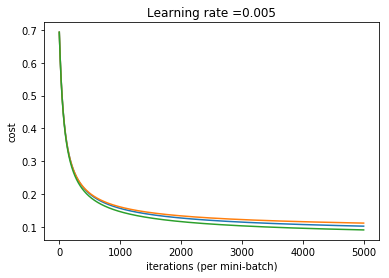

In [851]:
costs = np.squeeze(d['costs'])
val_costs = np.squeeze(d['val_costs'])
test_costs = np.squeeze(d['test_costs'])
plt.plot(costs)
plt.plot(val_costs)
plt.plot(test_costs)
plt.ylabel('cost')
plt.xlabel('iterations (per mini-batch)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

## Weight Decay

Weight decay can be used to help mini-batch gradient descent to converge better.

In [619]:
d = mb_model(train_set_x, train_set_y, validation_set_x, validation_set_y, test_set_x, test_set_y, lambda_reg = 0, batch_size = 500, num_epoch = 100, learning_rate = 0.01, T = 10, print_cost = True, weight_decay = True)

Training cost after iteration 0: 0.693147
Validation cost after iteration 0: 0.693147
Test cost after iteration 0: 0.693147
Training cost after iteration 0: 0.679018
Validation cost after iteration 0: 0.678538
Test cost after iteration 0: 0.678757
Training cost after iteration 0: 0.665077
Validation cost after iteration 0: 0.664255
Test cost after iteration 0: 0.664554
Training cost after iteration 0: 0.651107
Validation cost after iteration 0: 0.650574
Test cost after iteration 0: 0.650925
Training cost after iteration 0: 0.638792
Validation cost after iteration 0: 0.637316
Test cost after iteration 0: 0.637705
Training cost after iteration 0: 0.627366
Validation cost after iteration 0: 0.624840
Test cost after iteration 0: 0.625397
Training cost after iteration 0: 0.617746
Validation cost after iteration 0: 0.612992
Test cost after iteration 0: 0.613771
Training cost after iteration 0: 0.602423
Validation cost after iteration 0: 0.601758
Test cost after iteration 0: 0.602678
Training

Test cost after iteration 0: 0.317589
Training cost after iteration 0: 0.328480
Validation cost after iteration 0: 0.309736
Test cost after iteration 0: 0.316216
Training cost after iteration 0: 0.306764
Validation cost after iteration 0: 0.308315
Test cost after iteration 0: 0.314822
Training cost after iteration 0: 0.326328
Validation cost after iteration 0: 0.306866
Test cost after iteration 0: 0.313401
Training cost after iteration 0: 0.319420
Validation cost after iteration 0: 0.305488
Test cost after iteration 0: 0.312040
Training cost after iteration 0: 0.306572
Validation cost after iteration 0: 0.304154
Test cost after iteration 0: 0.310738
Training cost after iteration 0: 0.308598
Validation cost after iteration 0: 0.302789
Test cost after iteration 0: 0.309397
Training cost after iteration 0: 0.305865
Validation cost after iteration 0: 0.301448
Test cost after iteration 0: 0.308081
Training cost after iteration 0: 0.305015
Validation cost after iteration 0: 0.300142
Test cos

Training cost after iteration 0: 0.261774
Validation cost after iteration 0: 0.258855
Test cost after iteration 0: 0.266333
Training cost after iteration 0: 0.264804
Validation cost after iteration 0: 0.258586
Test cost after iteration 0: 0.266068
Training cost after iteration 0: 0.262818
Validation cost after iteration 0: 0.258320
Test cost after iteration 0: 0.265806
Training cost after iteration 0: 0.263724
Validation cost after iteration 0: 0.258061
Test cost after iteration 0: 0.265559
Training cost after iteration 0: 0.257985
Validation cost after iteration 0: 0.257795
Test cost after iteration 0: 0.265293
Training cost after iteration 0: 0.275288
Validation cost after iteration 0: 0.257540
Test cost after iteration 0: 0.265044
Training cost after iteration 0: 0.269606
Validation cost after iteration 0: 0.257280
Test cost after iteration 0: 0.264786
Training cost after iteration 0: 0.250234
Validation cost after iteration 0: 0.257025
Test cost after iteration 0: 0.264540
Training

Training cost after iteration 0: 0.254695
Validation cost after iteration 0: 0.250165
Test cost after iteration 0: 0.257801
Training cost after iteration 0: 0.255943
Validation cost after iteration 0: 0.250124
Test cost after iteration 0: 0.257762
Training cost after iteration 0: 0.250500
Validation cost after iteration 0: 0.250082
Test cost after iteration 0: 0.257720
Training cost after iteration 0: 0.267975
Validation cost after iteration 0: 0.250041
Test cost after iteration 0: 0.257681
Training cost after iteration 0: 0.262541
Validation cost after iteration 0: 0.250000
Test cost after iteration 0: 0.257639
Training cost after iteration 0: 0.243158
Validation cost after iteration 0: 0.249959
Test cost after iteration 0: 0.257600
Training cost after iteration 0: 0.265970
Validation cost after iteration 0: 0.249918
Test cost after iteration 0: 0.257561
Training cost after iteration 0: 0.259186
Validation cost after iteration 0: 0.249876
Test cost after iteration 0: 0.257519
Training

Validation cost after iteration 0: 0.248966
Test cost after iteration 0: 0.256625
Training cost after iteration 0: 0.246227
Validation cost after iteration 0: 0.248964
Test cost after iteration 0: 0.256623
Training cost after iteration 0: 0.269969
Validation cost after iteration 0: 0.248962
Test cost after iteration 0: 0.256621
Training cost after iteration 0: 0.264846
Validation cost after iteration 0: 0.248960
Test cost after iteration 0: 0.256619
Training cost after iteration 0: 0.251997
Validation cost after iteration 0: 0.248958
Test cost after iteration 0: 0.256617
Training cost after iteration 0: 0.255273
Validation cost after iteration 0: 0.248956
Test cost after iteration 0: 0.256615
Training cost after iteration 0: 0.253489
Validation cost after iteration 0: 0.248954
Test cost after iteration 0: 0.256613
Training cost after iteration 0: 0.254795
Validation cost after iteration 0: 0.248953
Test cost after iteration 0: 0.256611
Training cost after iteration 0: 0.249403
Validati

Training cost after iteration 0: 0.261401
Validation cost after iteration 0: 0.248907
Test cost after iteration 0: 0.256567
Training cost after iteration 0: 0.254662
Validation cost after iteration 0: 0.248907
Test cost after iteration 0: 0.256567
Training cost after iteration 0: 0.248986
Validation cost after iteration 0: 0.248907
Test cost after iteration 0: 0.256567
Training cost after iteration 0: 0.254913
Validation cost after iteration 0: 0.248907
Test cost after iteration 0: 0.256567
Training cost after iteration 0: 0.260004
Validation cost after iteration 0: 0.248907
Test cost after iteration 0: 0.256567
Training cost after iteration 0: 0.252739
Validation cost after iteration 0: 0.248907
Test cost after iteration 0: 0.256567
Training cost after iteration 0: 0.269096
Validation cost after iteration 0: 0.248907
Test cost after iteration 0: 0.256567
Training cost after iteration 0: 0.246169
Validation cost after iteration 0: 0.248907
Test cost after iteration 0: 0.256567
Training

Training cost after iteration 0: 0.261399
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.254661
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.248984
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.254911
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.260003
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.252738
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.269094
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.246167
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training

Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.242103
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.264953
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.258225
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.261777
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.262680
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.261399
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.254661
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.248984
Validati

Training cost after iteration 0: 0.269094
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.246167
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.269914
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.264794
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.251945
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.255223
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.253441
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.254749
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training

Training cost after iteration 0: 0.255223
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.253441
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.254749
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.249360
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.266866
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.261479
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.242103
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.264953
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training

Training cost after iteration 0: 0.254911
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.260003
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.252738
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.269094
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.246167
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.269914
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.264794
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.251945
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training

Training cost after iteration 0: 0.242103
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.264953
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.258225
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.261777
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.262680
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.261399
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.254661
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.248984
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training

Training cost after iteration 0: 0.242103
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.264953
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.258225
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.261777
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.262680
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.261399
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.254661
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.248984
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training

Training cost after iteration 0: 0.254661
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.248984
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.254911
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.260003
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.252738
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.269094
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.246167
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.269914
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training

Training cost after iteration 0: 0.242103
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.264953
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.258225
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.261777
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.262680
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.261399
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.254661
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.248984
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training

Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.269094
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.246167
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.269914
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.264794
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.251945
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.255223
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.253441
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.254749
Validation cost after iteration 0: 0.248906
Test cos

Training cost after iteration 0: 0.266866
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.261479
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.242103
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.264953
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.258225
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.261777
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.262680
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.261399
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training

Training cost after iteration 0: 0.252738
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.269094
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.246167
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.269914
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.264794
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.251945
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.255223
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.253441
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training

Training cost after iteration 0: 0.254661
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.248984
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.254911
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.260003
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.252738
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.269094
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.246167
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.269914
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training

Training cost after iteration 0: 0.251945
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.255223
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.253441
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.254749
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.249360
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.266866
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.261479
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.242103
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training

Training cost after iteration 0: 0.254749
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.249360
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.266866
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.261479
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.242103
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.264953
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.258225
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.261777
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training

Training cost after iteration 0: 0.266866
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.261479
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.242103
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.264953
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.258225
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.261777
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.262680
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.261399
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training

Training cost after iteration 0: 0.258225
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.261777
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.262680
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.261399
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.254661
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.248984
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.254911
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.260003
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training

Training cost after iteration 0: 0.261777
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.262680
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.261399
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.254661
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.248984
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.254911
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.260003
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.252738
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training

Training cost after iteration 0: 0.269094
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.246167
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.269914
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.264794
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.251945
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.255223
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.253441
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.254749
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training

Training cost after iteration 0: 0.253441
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.254749
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.249360
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.266866
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.261479
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.242103
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.264953
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.258225
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training

Training cost after iteration 0: 0.261777
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.262680
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.261399
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.254661
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.248984
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.254911
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.260003
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.252738
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training

Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.260003
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.252738
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.269094
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.246167
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.269914
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.264794
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.251945
Validation cost after iteration 0: 0.248906
Test cost after iteration 0: 0.256565
Training cost after iteration 0: 0.255223
Validation cost after iteration 0: 0.248906
Test cos

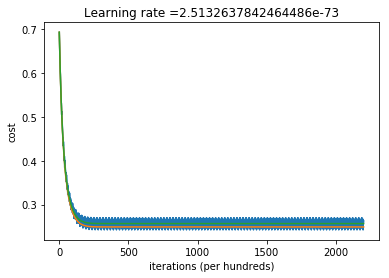

In [620]:
costs = np.squeeze(d['costs'])
val_costs = np.squeeze(d['val_costs'])
test_costs = np.squeeze(d['test_costs'])
plt.plot(costs)
plt.plot(val_costs)
plt.plot(test_costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

## Softmax Regresssion

To implement softmax regression, we need to first modify the original labels in the dataset so they now are described using a vector.

In [539]:
shuf = np.arange(train_images.shape[0])
np.random.shuffle(shuf)
train_images = train_images[shuf]
train_labels = train_labels[shuf]

shuf = np.arange(test_images.shape[0])
np.random.shuffle(shuf)
test_images = test_images[shuf]
test_labels = test_labels[shuf]

softmax_train_y = np.zeros([10,train_images[0:500,:].T.shape[1]])
softmax_test_y = np.zeros([10,test_images[0:500,:].T.shape[1]])
softmax_val_y = np.zeros([10,train_images[501:620,:].T.shape[1]])
softmax_train_x = train_images[0:500,:].T/255.
softmax_test_x = test_images[0:500,:].T/255.
softmax_val_x = train_images[501:620,:].T/255.

for i in range(0,train_images[0:500,:].T.shape[1]):
    softmax_train_y[int(train_labels[i,0]),i] = 1
    
for j in range(0,test_images[0:500,:].T.shape[1]):
    softmax_test_y[int(test_labels[j,0]),j] = 1
    
for k in range(0,train_images[501:620,:].T.shape[1]):
    softmax_val_y[int(train_labels[k,0]),k] = 1

In [519]:
print(shuf)

[2042 8971 9046 ..., 1296 2110 5680]


[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
1


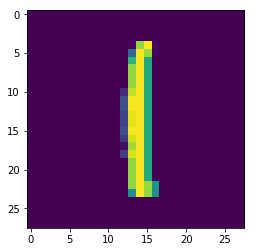

In [540]:
print(softmax_train_y[:,31])
print(train_labels[31,0])
plt.imshow(softmax_train_x[:,31].reshape([28,28]))

The softmax regression is just a generalization of logistic regression. We only need to change the function propagate to compute new cost and gradients of softmax regression.

In [556]:
def propagate_softmax(w, b, X, Y, lambda_reg):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px, num_class)
    b -- bias, a scalar
    X -- data of size (num_px * num_px, number of examples)
    Y -- true "label" vector of size (num_class, number of examples)

    Return:
    cost -- negative log-likelihood cost for softmax regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    
    """
    
    m = X.shape[1]
    A = sigmoid(np.dot(w.T,X)+b)
    
    A = A - np.max(A)
    
    A_softmax = np.exp(A)/np.sum(np.exp(A),axis=0,keepdims=True)
    #print(A_softmax)
    
    cost = -(1/m)*np.sum(np.multiply(Y,np.log(A_softmax)),keepdims=True) + (lambda_reg/(2*m)) * np.sum(np.power(w,2))                                 # compute cost

    dw = (1/m)*(np.dot(X,(A_softmax-Y).T)) + (lambda_reg/m) * w
    
    
    db = (1/m)*np.sum(A_softmax-Y,keepdims=True)

    cost = np.squeeze(cost)
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [484]:
def softmax_optimize(w, b, X, Y, lambda_reg, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.

    """
    
    costs = []

    for i in range(num_iterations):
        grads, cost = propagate_softmax(w, b, X, Y, lambda_reg)
        
        dw = grads["dw"]
        db = grads["db"]

        w = w-learning_rate*dw
        b = b-learning_rate*db

        if i % 100 == 0:
            costs.append(cost)
        
        if print_cost and i % 50 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [561]:
def softmax_predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    m = X.shape[1]
    Y_prediction = np.zeros((10,m))
    w = w.reshape(X.shape[0], 10)
    
    A = sigmoid(np.dot(w.T,X)+b)
    A_softmax = np.exp(A)/np.sum(np.exp(A),axis=0,keepdims=True)
    
    for i in range(A_softmax.shape[1]):
        
        Y_prediction[:,i] = np.where(A_softmax[:,i]>0.5,1,0)
    
    return Y_prediction

In [486]:
def softmax_mb_model(X_train, Y_train, X_val, Y_val, X_test, Y_test, lambda_reg, num_epoch = 10, learning_rate = 0.5, print_cost = True):
    """
    Builds the logistic regression model by calling the function you've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    costs_mb = []
    w, b = np.zeros((X_train.shape[0],10)), 0.
    
    for i in range(0,num_epoch):
        for j in range(0,X_train.shape[1]-10,9):
            parameters, grads, costs = softmax_optimize(w, b, X_train[:,j:j+9].reshape(784,9), Y_train[:,j:j+9].reshape(10,9), lambda_reg, 1, learning_rate, print_cost = True)
            w = parameters["w"]
            b = parameters["b"]
            costs_mb.append(costs)
    
    Y_prediction_test = softmax_predict(w, b, X_test)
    Y_prediction_train = softmax_predict(w, b, X_train)
    Y_prediction_val = softmax_predict(w, b, X_val)

    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("Hold-out validation set accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_val - Y_val)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs_mb,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train,
         "Y_prediction_val": Y_prediction_val,
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate}
    
    return d

## Train the Softmax Regression Model

In [562]:
d = softmax_mb_model(softmax_train_x, softmax_train_y, softmax_val_x, softmax_val_y, softmax_test_x, softmax_test_y, lambda_reg = 0, num_epoch = 200, learning_rate = 0.01, print_cost = True)

Cost after iteration 0: 2.302585
Cost after iteration 0: 2.297376
Cost after iteration 0: 2.301901
Cost after iteration 0: 2.278768
Cost after iteration 0: 2.284227
Cost after iteration 0: 2.264551
Cost after iteration 0: 2.300547
Cost after iteration 0: 2.274202
Cost after iteration 0: 2.273856
Cost after iteration 0: 2.261025
Cost after iteration 0: 2.288882
Cost after iteration 0: 2.273649
Cost after iteration 0: 2.270885
Cost after iteration 0: 2.284136
Cost after iteration 0: 2.276538
Cost after iteration 0: 2.265450
Cost after iteration 0: 2.244301
Cost after iteration 0: 2.245568
Cost after iteration 0: 2.239751
Cost after iteration 0: 2.262147
Cost after iteration 0: 2.264127
Cost after iteration 0: 2.235197
Cost after iteration 0: 2.247513
Cost after iteration 0: 2.240363
Cost after iteration 0: 2.253327
Cost after iteration 0: 2.242607
Cost after iteration 0: 2.188949
Cost after iteration 0: 2.238213
Cost after iteration 0: 2.226403
Cost after iteration 0: 2.212203
Cost after

Cost after iteration 0: 1.878222
Cost after iteration 0: 1.922003
Cost after iteration 0: 1.978053
Cost after iteration 0: 1.941520
Cost after iteration 0: 1.983256
Cost after iteration 0: 1.865274
Cost after iteration 0: 1.838708
Cost after iteration 0: 1.979877
Cost after iteration 0: 1.896694
Cost after iteration 0: 1.950721
Cost after iteration 0: 1.932833
Cost after iteration 0: 1.924418
Cost after iteration 0: 1.904595
Cost after iteration 0: 1.925925
Cost after iteration 0: 1.857421
Cost after iteration 0: 1.878693
Cost after iteration 0: 1.931637
Cost after iteration 0: 1.875854
Cost after iteration 0: 1.892614
Cost after iteration 0: 1.846793
Cost after iteration 0: 1.950891
Cost after iteration 0: 1.897583
Cost after iteration 0: 1.871188
Cost after iteration 0: 1.877023
Cost after iteration 0: 1.977465
Cost after iteration 0: 1.975916
Cost after iteration 0: 1.923571
Cost after iteration 0: 1.940123
Cost after iteration 0: 1.871213
Cost after iteration 0: 1.921080
Cost after

Cost after iteration 0: 1.848047
Cost after iteration 0: 1.893724
Cost after iteration 0: 1.870349
Cost after iteration 0: 1.915193
Cost after iteration 0: 1.933238
Cost after iteration 0: 1.843573
Cost after iteration 0: 1.888499
Cost after iteration 0: 1.958999
Cost after iteration 0: 1.825076
Cost after iteration 0: 1.894285
Cost after iteration 0: 1.848057
Cost after iteration 0: 1.834542
Cost after iteration 0: 1.818206
Cost after iteration 0: 1.814562
Cost after iteration 0: 1.835766
Cost after iteration 0: 1.854138
Cost after iteration 0: 1.832452
Cost after iteration 0: 1.785347
Cost after iteration 0: 1.957534
Cost after iteration 0: 1.891238
Cost after iteration 0: 1.888592
Cost after iteration 0: 1.845099
Cost after iteration 0: 1.925291
Cost after iteration 0: 1.840400
Cost after iteration 0: 1.863196
Cost after iteration 0: 1.902265
Cost after iteration 0: 1.870272
Cost after iteration 0: 1.916824
Cost after iteration 0: 1.826394
Cost after iteration 0: 1.811849
Cost after

Cost after iteration 0: 1.809687
Cost after iteration 0: 1.944292
Cost after iteration 0: 1.820986
Cost after iteration 0: 1.880782
Cost after iteration 0: 1.887586
Cost after iteration 0: 1.855697
Cost after iteration 0: 1.864401
Cost after iteration 0: 1.879403
Cost after iteration 0: 1.807994
Cost after iteration 0: 1.842941
Cost after iteration 0: 1.850118
Cost after iteration 0: 1.819532
Cost after iteration 0: 1.845573
Cost after iteration 0: 1.817162
Cost after iteration 0: 1.836052
Cost after iteration 0: 1.830134
Cost after iteration 0: 1.826658
Cost after iteration 0: 1.822854
Cost after iteration 0: 1.924260
Cost after iteration 0: 1.945154
Cost after iteration 0: 1.858266
Cost after iteration 0: 1.849562
Cost after iteration 0: 1.818525
Cost after iteration 0: 1.857870
Cost after iteration 0: 1.902677
Cost after iteration 0: 1.854233
Cost after iteration 0: 1.829257
Cost after iteration 0: 1.875194
Cost after iteration 0: 1.853079
Cost after iteration 0: 1.881859
Cost after

Cost after iteration 0: 1.829494
Cost after iteration 0: 1.889142
Cost after iteration 0: 1.829188
Cost after iteration 0: 1.802884
Cost after iteration 0: 1.823308
Cost after iteration 0: 1.813504
Cost after iteration 0: 1.836200
Cost after iteration 0: 1.840977
Cost after iteration 0: 1.832756
Cost after iteration 0: 1.770788
Cost after iteration 0: 1.930407
Cost after iteration 0: 1.864057
Cost after iteration 0: 1.865510
Cost after iteration 0: 1.840253
Cost after iteration 0: 1.884047
Cost after iteration 0: 1.839407
Cost after iteration 0: 1.826017
Cost after iteration 0: 1.837048
Cost after iteration 0: 1.835598
Cost after iteration 0: 1.879135
Cost after iteration 0: 1.805271
Cost after iteration 0: 1.813381
Cost after iteration 0: 1.935726
Cost after iteration 0: 1.817804
Cost after iteration 0: 1.874597
Cost after iteration 0: 1.886343
Cost after iteration 0: 1.850514
Cost after iteration 0: 1.863383
Cost after iteration 0: 1.875008
Cost after iteration 0: 1.801889
Cost after

Cost after iteration 0: 1.939160
Cost after iteration 0: 1.833236
Cost after iteration 0: 1.890235
Cost after iteration 0: 1.828437
Cost after iteration 0: 1.801164
Cost after iteration 0: 1.828198
Cost after iteration 0: 1.815663
Cost after iteration 0: 1.837762
Cost after iteration 0: 1.843913
Cost after iteration 0: 1.836176
Cost after iteration 0: 1.771276
Cost after iteration 0: 1.929309
Cost after iteration 0: 1.859089
Cost after iteration 0: 1.866103
Cost after iteration 0: 1.841781
Cost after iteration 0: 1.878894
Cost after iteration 0: 1.841808
Cost after iteration 0: 1.826570
Cost after iteration 0: 1.833061
Cost after iteration 0: 1.835138
Cost after iteration 0: 1.879745
Cost after iteration 0: 1.804130
Cost after iteration 0: 1.815598
Cost after iteration 0: 1.930714
Cost after iteration 0: 1.818609
Cost after iteration 0: 1.874265
Cost after iteration 0: 1.886896
Cost after iteration 0: 1.850172
Cost after iteration 0: 1.864004
Cost after iteration 0: 1.874254
Cost after

Cost after iteration 0: 1.815461
Cost after iteration 0: 1.821558
Cost after iteration 0: 1.950811
Cost after iteration 0: 1.964086
Cost after iteration 0: 1.859458
Cost after iteration 0: 1.838816
Cost after iteration 0: 1.813465
Cost after iteration 0: 1.850301
Cost after iteration 0: 1.888228
Cost after iteration 0: 1.825152
Cost after iteration 0: 1.832100
Cost after iteration 0: 1.875576
Cost after iteration 0: 1.844640
Cost after iteration 0: 1.863067
Cost after iteration 0: 1.935736
Cost after iteration 0: 1.835176
Cost after iteration 0: 1.864979
Cost after iteration 0: 1.938593
Cost after iteration 0: 1.836648
Cost after iteration 0: 1.891539
Cost after iteration 0: 1.828087
Cost after iteration 0: 1.800585
Cost after iteration 0: 1.832515
Cost after iteration 0: 1.817476
Cost after iteration 0: 1.839148
Cost after iteration 0: 1.846685
Cost after iteration 0: 1.839050
Cost after iteration 0: 1.772140
Cost after iteration 0: 1.929991
Cost after iteration 0: 1.854718
Cost after

Cost after iteration 0: 1.828548
Cost after iteration 0: 1.831847
Cost after iteration 0: 1.807273
Cost after iteration 0: 1.850676
Cost after iteration 0: 1.814033
Cost after iteration 0: 1.800110
Cost after iteration 0: 1.831129
Cost after iteration 0: 1.813614
Cost after iteration 0: 1.822107
Cost after iteration 0: 1.956328
Cost after iteration 0: 1.968115
Cost after iteration 0: 1.860491
Cost after iteration 0: 1.839005
Cost after iteration 0: 1.813876
Cost after iteration 0: 1.850529
Cost after iteration 0: 1.886130
Cost after iteration 0: 1.821083
Cost after iteration 0: 1.833246
Cost after iteration 0: 1.876260
Cost after iteration 0: 1.843972
Cost after iteration 0: 1.862424
Cost after iteration 0: 1.938363
Cost after iteration 0: 1.835879
Cost after iteration 0: 1.864654
Cost after iteration 0: 1.938375
Cost after iteration 0: 1.839189
Cost after iteration 0: 1.892664
Cost after iteration 0: 1.827939
Cost after iteration 0: 1.800540
Cost after iteration 0: 1.835661
Cost after

Cost after iteration 0: 1.862312
Cost after iteration 0: 1.940746
Cost after iteration 0: 1.836662
Cost after iteration 0: 1.864522
Cost after iteration 0: 1.938297
Cost after iteration 0: 1.841461
Cost after iteration 0: 1.893772
Cost after iteration 0: 1.827864
Cost after iteration 0: 1.800721
Cost after iteration 0: 1.838445
Cost after iteration 0: 1.819798
Cost after iteration 0: 1.841205
Cost after iteration 0: 1.850505
Cost after iteration 0: 1.842837
Cost after iteration 0: 1.773752
Cost after iteration 0: 1.933153
Cost after iteration 0: 1.848837
Cost after iteration 0: 1.870130
Cost after iteration 0: 1.845559
Cost after iteration 0: 1.875553
Cost after iteration 0: 1.846743
Cost after iteration 0: 1.834267
Cost after iteration 0: 1.832078
Cost after iteration 0: 1.835458
Cost after iteration 0: 1.882908
Cost after iteration 0: 1.803829
Cost after iteration 0: 1.819131
Cost after iteration 0: 1.919853
Cost after iteration 0: 1.821073
Cost after iteration 0: 1.876207
Cost after

Cost after iteration 0: 1.820709
Cost after iteration 0: 1.842141
Cost after iteration 0: 1.852060
Cost after iteration 0: 1.844376
Cost after iteration 0: 1.774546
Cost after iteration 0: 1.935175
Cost after iteration 0: 1.846543
Cost after iteration 0: 1.871481
Cost after iteration 0: 1.846596
Cost after iteration 0: 1.875966
Cost after iteration 0: 1.847947
Cost after iteration 0: 1.836877
Cost after iteration 0: 1.832633
Cost after iteration 0: 1.835615
Cost after iteration 0: 1.883653
Cost after iteration 0: 1.803953
Cost after iteration 0: 1.819725
Cost after iteration 0: 1.917249
Cost after iteration 0: 1.821500
Cost after iteration 0: 1.876826
Cost after iteration 0: 1.890503
Cost after iteration 0: 1.852267
Cost after iteration 0: 1.866521
Cost after iteration 0: 1.874348
Cost after iteration 0: 1.796930
Cost after iteration 0: 1.824397
Cost after iteration 0: 1.831829
Cost after iteration 0: 1.805317
Cost after iteration 0: 1.855475
Cost after iteration 0: 1.813840
Cost after

Cost after iteration 0: 1.847569
Cost after iteration 0: 1.876665
Cost after iteration 0: 1.849027
Cost after iteration 0: 1.839324
Cost after iteration 0: 1.833261
Cost after iteration 0: 1.835767
Cost after iteration 0: 1.884273
Cost after iteration 0: 1.804096
Cost after iteration 0: 1.820165
Cost after iteration 0: 1.914987
Cost after iteration 0: 1.821778
Cost after iteration 0: 1.877349
Cost after iteration 0: 1.891386
Cost after iteration 0: 1.852818
Cost after iteration 0: 1.867007
Cost after iteration 0: 1.874489
Cost after iteration 0: 1.796681
Cost after iteration 0: 1.822672
Cost after iteration 0: 1.832115
Cost after iteration 0: 1.804587
Cost after iteration 0: 1.857267
Cost after iteration 0: 1.813803
Cost after iteration 0: 1.798758
Cost after iteration 0: 1.835122
Cost after iteration 0: 1.809153
Cost after iteration 0: 1.823484
Cost after iteration 0: 1.969980
Cost after iteration 0: 1.978764
Cost after iteration 0: 1.863177
Cost after iteration 0: 1.840508
Cost after

Cost after iteration 0: 1.821043
Cost after iteration 0: 1.832480
Cost after iteration 0: 1.803929
Cost after iteration 0: 1.858827
Cost after iteration 0: 1.813783
Cost after iteration 0: 1.798729
Cost after iteration 0: 1.836201
Cost after iteration 0: 1.808135
Cost after iteration 0: 1.823808
Cost after iteration 0: 1.973337
Cost after iteration 0: 1.981521
Cost after iteration 0: 1.863867
Cost after iteration 0: 1.841026
Cost after iteration 0: 1.815777
Cost after iteration 0: 1.852903
Cost after iteration 0: 1.879723
Cost after iteration 0: 1.809907
Cost after iteration 0: 1.835734
Cost after iteration 0: 1.879324
Cost after iteration 0: 1.842759
Cost after iteration 0: 1.863465
Cost after iteration 0: 1.946743
Cost after iteration 0: 1.839312
Cost after iteration 0: 1.864506
Cost after iteration 0: 1.938525
Cost after iteration 0: 1.847197
Cost after iteration 0: 1.896939
Cost after iteration 0: 1.827884
Cost after iteration 0: 1.802035
Cost after iteration 0: 1.845480
Cost after

Cost after iteration 0: 1.840116
Cost after iteration 0: 1.864503
Cost after iteration 0: 1.938668
Cost after iteration 0: 1.848606
Cost after iteration 0: 1.897774
Cost after iteration 0: 1.827937
Cost after iteration 0: 1.802557
Cost after iteration 0: 1.847234
Cost after iteration 0: 1.822882
Cost after iteration 0: 1.844781
Cost after iteration 0: 1.855816
Cost after iteration 0: 1.848211
Cost after iteration 0: 1.776891
Cost after iteration 0: 1.941890
Cost after iteration 0: 1.841494
Cost after iteration 0: 1.875383
Cost after iteration 0: 1.849506
Cost after iteration 0: 1.878684
Cost after iteration 0: 1.851030
Cost after iteration 0: 1.843987
Cost after iteration 0: 1.834623
Cost after iteration 0: 1.836069
Cost after iteration 0: 1.885309
Cost after iteration 0: 1.804435
Cost after iteration 0: 1.820750
Cost after iteration 0: 1.911040
Cost after iteration 0: 1.822005
Cost after iteration 0: 1.878160
Cost after iteration 0: 1.893177
Cost after iteration 0: 1.853884
Cost after

Cost after iteration 0: 1.909634
Cost after iteration 0: 1.821989
Cost after iteration 0: 1.878395
Cost after iteration 0: 1.893916
Cost after iteration 0: 1.854302
Cost after iteration 0: 1.868307
Cost after iteration 0: 1.874800
Cost after iteration 0: 1.796191
Cost after iteration 0: 1.817809
Cost after iteration 0: 1.833391
Cost after iteration 0: 1.802680
Cost after iteration 0: 1.861576
Cost after iteration 0: 1.813769
Cost after iteration 0: 1.798796
Cost after iteration 0: 1.838270
Cost after iteration 0: 1.806369
Cost after iteration 0: 1.824403
Cost after iteration 0: 1.979704
Cost after iteration 0: 1.986817
Cost after iteration 0: 1.865211
Cost after iteration 0: 1.842086
Cost after iteration 0: 1.816545
Cost after iteration 0: 1.854250
Cost after iteration 0: 1.877677
Cost after iteration 0: 1.806367
Cost after iteration 0: 1.836196
Cost after iteration 0: 1.880988
Cost after iteration 0: 1.842678
Cost after iteration 0: 1.864563
Cost after iteration 0: 1.949654
Cost after

Cost after iteration 0: 1.864428
Cost after iteration 0: 1.939020
Cost after iteration 0: 1.851230
Cost after iteration 0: 1.899347
Cost after iteration 0: 1.828091
Cost after iteration 0: 1.803766
Cost after iteration 0: 1.850553
Cost after iteration 0: 1.823928
Cost after iteration 0: 1.846326
Cost after iteration 0: 1.857617
Cost after iteration 0: 1.850146
Cost after iteration 0: 1.778314
Cost after iteration 0: 1.946032
Cost after iteration 0: 1.839423
Cost after iteration 0: 1.877655
Cost after iteration 0: 1.851199
Cost after iteration 0: 1.880894
Cost after iteration 0: 1.852613
Cost after iteration 0: 1.847679
Cost after iteration 0: 1.835786
Cost after iteration 0: 1.836327
Cost after iteration 0: 1.886047
Cost after iteration 0: 1.804792
Cost after iteration 0: 1.820996
Cost after iteration 0: 1.908204
Cost after iteration 0: 1.821908
Cost after iteration 0: 1.878591
Cost after iteration 0: 1.894741
Cost after iteration 0: 1.854754
Cost after iteration 0: 1.868715
Cost after

Cost after iteration 0: 1.853220
Cost after iteration 0: 1.849079
Cost after iteration 0: 1.836236
Cost after iteration 0: 1.836432
Cost after iteration 0: 1.886319
Cost after iteration 0: 1.804963
Cost after iteration 0: 1.821036
Cost after iteration 0: 1.907193
Cost after iteration 0: 1.821804
Cost after iteration 0: 1.878697
Cost after iteration 0: 1.895383
Cost after iteration 0: 1.855092
Cost after iteration 0: 1.869030
Cost after iteration 0: 1.874876
Cost after iteration 0: 1.795972
Cost after iteration 0: 1.815064
Cost after iteration 0: 1.834302
Cost after iteration 0: 1.801637
Cost after iteration 0: 1.863619
Cost after iteration 0: 1.813759
Cost after iteration 0: 1.798872
Cost after iteration 0: 1.839965
Cost after iteration 0: 1.805105
Cost after iteration 0: 1.824881
Cost after iteration 0: 1.985019
Cost after iteration 0: 1.991207
Cost after iteration 0: 1.866359
Cost after iteration 0: 1.843005
Cost after iteration 0: 1.817137
Cost after iteration 0: 1.855480
Cost after

Cost after iteration 0: 1.858998
Cost after iteration 0: 1.851672
Cost after iteration 0: 1.779590
Cost after iteration 0: 1.949564
Cost after iteration 0: 1.838031
Cost after iteration 0: 1.879654
Cost after iteration 0: 1.852688
Cost after iteration 0: 1.883037
Cost after iteration 0: 1.853870
Cost after iteration 0: 1.850562
Cost after iteration 0: 1.836718
Cost after iteration 0: 1.836548
Cost after iteration 0: 1.886609
Cost after iteration 0: 1.805175
Cost after iteration 0: 1.821042
Cost after iteration 0: 1.906161
Cost after iteration 0: 1.821651
Cost after iteration 0: 1.878769
Cost after iteration 0: 1.896104
Cost after iteration 0: 1.855458
Cost after iteration 0: 1.869379
Cost after iteration 0: 1.874883
Cost after iteration 0: 1.795871
Cost after iteration 0: 1.813766
Cost after iteration 0: 1.834771
Cost after iteration 0: 1.801136
Cost after iteration 0: 1.864522
Cost after iteration 0: 1.813747
Cost after iteration 0: 1.798890
Cost after iteration 0: 1.840756
Cost after

Cost after iteration 0: 1.865188
Cost after iteration 0: 1.813733
Cost after iteration 0: 1.798890
Cost after iteration 0: 1.841353
Cost after iteration 0: 1.804196
Cost after iteration 0: 1.825276
Cost after iteration 0: 1.989567
Cost after iteration 0: 1.994845
Cost after iteration 0: 1.867346
Cost after iteration 0: 1.843795
Cost after iteration 0: 1.817580
Cost after iteration 0: 1.856573
Cost after iteration 0: 1.875514
Cost after iteration 0: 1.801750
Cost after iteration 0: 1.836658
Cost after iteration 0: 1.884113
Cost after iteration 0: 1.843028
Cost after iteration 0: 1.866327
Cost after iteration 0: 1.953444
Cost after iteration 0: 1.843964
Cost after iteration 0: 1.864146
Cost after iteration 0: 1.939566
Cost after iteration 0: 1.854327
Cost after iteration 0: 1.901149
Cost after iteration 0: 1.828386
Cost after iteration 0: 1.805627
Cost after iteration 0: 1.854580
Cost after iteration 0: 1.825093
Cost after iteration 0: 1.848370
Cost after iteration 0: 1.859623
Cost after

Cost after iteration 0: 1.813715
Cost after iteration 0: 1.798875
Cost after iteration 0: 1.841901
Cost after iteration 0: 1.803871
Cost after iteration 0: 1.825434
Cost after iteration 0: 1.991433
Cost after iteration 0: 1.996286
Cost after iteration 0: 1.867749
Cost after iteration 0: 1.844118
Cost after iteration 0: 1.817739
Cost after iteration 0: 1.857027
Cost after iteration 0: 1.875279
Cost after iteration 0: 1.801001
Cost after iteration 0: 1.836746
Cost after iteration 0: 1.884758
Cost after iteration 0: 1.843158
Cost after iteration 0: 1.866621
Cost after iteration 0: 1.954036
Cost after iteration 0: 1.844523
Cost after iteration 0: 1.864037
Cost after iteration 0: 1.939717
Cost after iteration 0: 1.855072
Cost after iteration 0: 1.901562
Cost after iteration 0: 1.828479
Cost after iteration 0: 1.806149
Cost after iteration 0: 1.855570
Cost after iteration 0: 1.825360
Cost after iteration 0: 1.848905
Cost after iteration 0: 1.860091
Cost after iteration 0: 1.852881
Cost after

Cost after iteration 0: 1.853347
Cost after iteration 0: 1.781209
Cost after iteration 0: 1.953651
Cost after iteration 0: 1.836726
Cost after iteration 0: 1.882195
Cost after iteration 0: 1.854548
Cost after iteration 0: 1.885863
Cost after iteration 0: 1.855261
Cost after iteration 0: 1.853676
Cost after iteration 0: 1.837732
Cost after iteration 0: 1.836822
Cost after iteration 0: 1.887246
Cost after iteration 0: 1.805784
Cost after iteration 0: 1.820918
Cost after iteration 0: 1.904132
Cost after iteration 0: 1.821169
Cost after iteration 0: 1.878763
Cost after iteration 0: 1.897816
Cost after iteration 0: 1.856251
Cost after iteration 0: 1.870185
Cost after iteration 0: 1.874834
Cost after iteration 0: 1.795652
Cost after iteration 0: 1.810932
Cost after iteration 0: 1.835897
Cost after iteration 0: 1.799981
Cost after iteration 0: 1.866439
Cost after iteration 0: 1.813689
Cost after iteration 0: 1.798841
Cost after iteration 0: 1.842500
Cost after iteration 0: 1.803539
Cost after

Cost after iteration 0: 1.856509
Cost after iteration 0: 1.902327
Cost after iteration 0: 1.828685
Cost after iteration 0: 1.807238
Cost after iteration 0: 1.857505
Cost after iteration 0: 1.825859
Cost after iteration 0: 1.849991
Cost after iteration 0: 1.860985
Cost after iteration 0: 1.853845
Cost after iteration 0: 1.781750
Cost after iteration 0: 1.954904
Cost after iteration 0: 1.836377
Cost after iteration 0: 1.883061
Cost after iteration 0: 1.855164
Cost after iteration 0: 1.886822
Cost after iteration 0: 1.855679
Cost after iteration 0: 1.854596
Cost after iteration 0: 1.838030
Cost after iteration 0: 1.836915
Cost after iteration 0: 1.887450
Cost after iteration 0: 1.806026
Cost after iteration 0: 1.820840
Cost after iteration 0: 1.903570
Cost after iteration 0: 1.820980
Cost after iteration 0: 1.878715
Cost after iteration 0: 1.898398
Cost after iteration 0: 1.856492
Cost after iteration 0: 1.870447
Cost after iteration 0: 1.874804
Cost after iteration 0: 1.795587
Cost after

Cost after iteration 0: 1.886745
Cost after iteration 0: 1.843644
Cost after iteration 0: 1.867359
Cost after iteration 0: 1.955549
Cost after iteration 0: 1.846162
Cost after iteration 0: 1.863617
Cost after iteration 0: 1.940176
Cost after iteration 0: 1.857193
Cost after iteration 0: 1.902676
Cost after iteration 0: 1.828798
Cost after iteration 0: 1.807794
Cost after iteration 0: 1.858442
Cost after iteration 0: 1.826089
Cost after iteration 0: 1.850536
Cost after iteration 0: 1.861412
Cost after iteration 0: 1.854287
Cost after iteration 0: 1.782259
Cost after iteration 0: 1.956028
Cost after iteration 0: 1.836082
Cost after iteration 0: 1.883888
Cost after iteration 0: 1.855741
Cost after iteration 0: 1.887727
Cost after iteration 0: 1.856053
Cost after iteration 0: 1.855412
Cost after iteration 0: 1.838291
Cost after iteration 0: 1.837004
Cost after iteration 0: 1.887640
Cost after iteration 0: 1.806276
Cost after iteration 0: 1.820752
Cost after iteration 0: 1.903089
Cost after

Cost after iteration 0: 1.838486
Cost after iteration 0: 1.837076
Cost after iteration 0: 1.887791
Cost after iteration 0: 1.806488
Cost after iteration 0: 1.820675
Cost after iteration 0: 1.902738
Cost after iteration 0: 1.820639
Cost after iteration 0: 1.878590
Cost after iteration 0: 1.899402
Cost after iteration 0: 1.856866
Cost after iteration 0: 1.870880
Cost after iteration 0: 1.874745
Cost after iteration 0: 1.795490
Cost after iteration 0: 1.808754
Cost after iteration 0: 1.836906
Cost after iteration 0: 1.798977
Cost after iteration 0: 1.867975
Cost after iteration 0: 1.813601
Cost after iteration 0: 1.798665
Cost after iteration 0: 1.843916
Cost after iteration 0: 1.802856
Cost after iteration 0: 1.826033
Cost after iteration 0: 1.998773
Cost after iteration 0: 2.001550
Cost after iteration 0: 1.869309
Cost after iteration 0: 1.845388
Cost after iteration 0: 1.818219
Cost after iteration 0: 1.858805
Cost after iteration 0: 1.874918
Cost after iteration 0: 1.798427
Cost after

Cost after iteration 0: 1.902427
Cost after iteration 0: 1.820489
Cost after iteration 0: 1.878523
Cost after iteration 0: 1.899837
Cost after iteration 0: 1.857012
Cost after iteration 0: 1.871058
Cost after iteration 0: 1.874719
Cost after iteration 0: 1.795455
Cost after iteration 0: 1.808245
Cost after iteration 0: 1.837171
Cost after iteration 0: 1.798716
Cost after iteration 0: 1.868363
Cost after iteration 0: 1.813573
Cost after iteration 0: 1.798597
Cost after iteration 0: 1.844269
Cost after iteration 0: 1.802711
Cost after iteration 0: 1.826142
Cost after iteration 0: 2.000148
Cost after iteration 0: 2.002452
Cost after iteration 0: 1.869596
Cost after iteration 0: 1.845628
Cost after iteration 0: 1.818281
Cost after iteration 0: 1.859132
Cost after iteration 0: 1.874945
Cost after iteration 0: 1.798007
Cost after iteration 0: 1.837332
Cost after iteration 0: 1.887862
Cost after iteration 0: 1.843966
Cost after iteration 0: 1.867656
Cost after iteration 0: 1.956223
Cost after

Cost after iteration 0: 1.856995
Cost after iteration 0: 1.857468
Cost after iteration 0: 1.838934
Cost after iteration 0: 1.837269
Cost after iteration 0: 1.888182
Cost after iteration 0: 1.807096
Cost after iteration 0: 1.820449
Cost after iteration 0: 1.901951
Cost after iteration 0: 1.820229
Cost after iteration 0: 1.878394
Cost after iteration 0: 1.900591
Cost after iteration 0: 1.857240
Cost after iteration 0: 1.871353
Cost after iteration 0: 1.874677
Cost after iteration 0: 1.795409
Cost after iteration 0: 1.807452
Cost after iteration 0: 1.837620
Cost after iteration 0: 1.798278
Cost after iteration 0: 1.869010
Cost after iteration 0: 1.813525
Cost after iteration 0: 1.798462
Cost after iteration 0: 1.844847
Cost after iteration 0: 1.802498
Cost after iteration 0: 1.826321
Cost after iteration 0: 2.002461
Cost after iteration 0: 2.003906
Cost after iteration 0: 1.870077
Cost after iteration 0: 1.846035
Cost after iteration 0: 1.818363
Cost after iteration 0: 1.859677
Cost after

Cost after iteration 0: 1.857350
Cost after iteration 0: 1.871504
Cost after iteration 0: 1.874657
Cost after iteration 0: 1.795391
Cost after iteration 0: 1.807072
Cost after iteration 0: 1.837854
Cost after iteration 0: 1.798051
Cost after iteration 0: 1.869344
Cost after iteration 0: 1.813500
Cost after iteration 0: 1.798382
Cost after iteration 0: 1.845139
Cost after iteration 0: 1.802402
Cost after iteration 0: 1.826413
Cost after iteration 0: 2.003664
Cost after iteration 0: 2.004630
Cost after iteration 0: 1.870327
Cost after iteration 0: 1.846249
Cost after iteration 0: 1.818395
Cost after iteration 0: 1.859957
Cost after iteration 0: 1.875137
Cost after iteration 0: 1.797017
Cost after iteration 0: 1.837695
Cost after iteration 0: 1.889110
Cost after iteration 0: 1.844356
Cost after iteration 0: 1.867876
Cost after iteration 0: 1.956846
Cost after iteration 0: 1.847982
Cost after iteration 0: 1.862937
Cost after iteration 0: 1.940700
Cost after iteration 0: 1.859478
Cost after

Cost after iteration 0: 1.940784
Cost after iteration 0: 1.859848
Cost after iteration 0: 1.903955
Cost after iteration 0: 1.829332
Cost after iteration 0: 1.810160
Cost after iteration 0: 1.862200
Cost after iteration 0: 1.826944
Cost after iteration 0: 1.852857
Cost after iteration 0: 1.863145
Cost after iteration 0: 1.855862
Cost after iteration 0: 1.784369
Cost after iteration 0: 1.960159
Cost after iteration 0: 1.835115
Cost after iteration 0: 1.887532
Cost after iteration 0: 1.858126
Cost after iteration 0: 1.891501
Cost after iteration 0: 1.857409
Cost after iteration 0: 1.858389
Cost after iteration 0: 1.839210
Cost after iteration 0: 1.837416
Cost after iteration 0: 1.888466
Cost after iteration 0: 1.807582
Cost after iteration 0: 1.820275
Cost after iteration 0: 1.901485
Cost after iteration 0: 1.819931
Cost after iteration 0: 1.878228
Cost after iteration 0: 1.901472
Cost after iteration 0: 1.857467
Cost after iteration 0: 1.871674
Cost after iteration 0: 1.874636
Cost after

Cost after iteration 0: 1.875364
Cost after iteration 0: 1.796389
Cost after iteration 0: 1.838004
Cost after iteration 0: 1.889969
Cost after iteration 0: 1.844636
Cost after iteration 0: 1.867949
Cost after iteration 0: 1.957201
Cost after iteration 0: 1.848617
Cost after iteration 0: 1.862631
Cost after iteration 0: 1.940878
Cost after iteration 0: 1.860261
Cost after iteration 0: 1.904149
Cost after iteration 0: 1.829431
Cost after iteration 0: 1.810554
Cost after iteration 0: 1.862811
Cost after iteration 0: 1.827074
Cost after iteration 0: 1.853253
Cost after iteration 0: 1.863437
Cost after iteration 0: 1.856084
Cost after iteration 0: 1.784715
Cost after iteration 0: 1.960764
Cost after iteration 0: 1.834988
Cost after iteration 0: 1.888178
Cost after iteration 0: 1.858518
Cost after iteration 0: 1.892124
Cost after iteration 0: 1.857604
Cost after iteration 0: 1.858830
Cost after iteration 0: 1.839337
Cost after iteration 0: 1.837494
Cost after iteration 0: 1.888614
Cost after

Cost after iteration 0: 1.829512
Cost after iteration 0: 1.810864
Cost after iteration 0: 1.863293
Cost after iteration 0: 1.827175
Cost after iteration 0: 1.853568
Cost after iteration 0: 1.863671
Cost after iteration 0: 1.856251
Cost after iteration 0: 1.784987
Cost after iteration 0: 1.961226
Cost after iteration 0: 1.834893
Cost after iteration 0: 1.888696
Cost after iteration 0: 1.858827
Cost after iteration 0: 1.892613
Cost after iteration 0: 1.857751
Cost after iteration 0: 1.859170
Cost after iteration 0: 1.839433
Cost after iteration 0: 1.837559
Cost after iteration 0: 1.888735
Cost after iteration 0: 1.808068
Cost after iteration 0: 1.820110
Cost after iteration 0: 1.901120
Cost after iteration 0: 1.819658
Cost after iteration 0: 1.878061
Cost after iteration 0: 1.902316
Cost after iteration 0: 1.857646
Cost after iteration 0: 1.871956
Cost after iteration 0: 1.874606
Cost after iteration 0: 1.795370
Cost after iteration 0: 1.806038
Cost after iteration 0: 1.838581
Cost after

Cost after iteration 0: 1.785244
Cost after iteration 0: 1.961655
Cost after iteration 0: 1.834808
Cost after iteration 0: 1.889198
Cost after iteration 0: 1.859120
Cost after iteration 0: 1.893078
Cost after iteration 0: 1.857886
Cost after iteration 0: 1.859488
Cost after iteration 0: 1.839521
Cost after iteration 0: 1.837623
Cost after iteration 0: 1.888854
Cost after iteration 0: 1.808288
Cost after iteration 0: 1.820040
Cost after iteration 0: 1.900982
Cost after iteration 0: 1.819541
Cost after iteration 0: 1.877985
Cost after iteration 0: 1.902687
Cost after iteration 0: 1.857713
Cost after iteration 0: 1.872073
Cost after iteration 0: 1.874596
Cost after iteration 0: 1.795375
Cost after iteration 0: 1.805797
Cost after iteration 0: 1.838778
Cost after iteration 0: 1.797169
Cost after iteration 0: 1.870658
Cost after iteration 0: 1.813416
Cost after iteration 0: 1.798014
Cost after iteration 0: 1.846240
Cost after iteration 0: 1.802119
Cost after iteration 0: 1.826766
Cost after

Cost after iteration 0: 1.859398
Cost after iteration 0: 1.893519
Cost after iteration 0: 1.858009
Cost after iteration 0: 1.859785
Cost after iteration 0: 1.839601
Cost after iteration 0: 1.837687
Cost after iteration 0: 1.888970
Cost after iteration 0: 1.808506
Cost after iteration 0: 1.819972
Cost after iteration 0: 1.900858
Cost after iteration 0: 1.819430
Cost after iteration 0: 1.877911
Cost after iteration 0: 1.903053
Cost after iteration 0: 1.857773
Cost after iteration 0: 1.872184
Cost after iteration 0: 1.874588
Cost after iteration 0: 1.795384
Cost after iteration 0: 1.805580
Cost after iteration 0: 1.838967
Cost after iteration 0: 1.796990
Cost after iteration 0: 1.870928
Cost after iteration 0: 1.813404
Cost after iteration 0: 1.797931
Cost after iteration 0: 1.846456
Cost after iteration 0: 1.802079
Cost after iteration 0: 1.826836
Cost after iteration 0: 2.009310
Cost after iteration 0: 2.007728
Cost after iteration 0: 1.871510
Cost after iteration 0: 1.847283
Cost after

Cost after iteration 0: 1.805383
Cost after iteration 0: 1.839151
Cost after iteration 0: 1.796819
Cost after iteration 0: 1.871189
Cost after iteration 0: 1.813395
Cost after iteration 0: 1.797848
Cost after iteration 0: 1.846661
Cost after iteration 0: 1.802047
Cost after iteration 0: 1.826904
Cost after iteration 0: 2.010220
Cost after iteration 0: 2.008183
Cost after iteration 0: 1.871705
Cost after iteration 0: 1.847455
Cost after iteration 0: 1.818441
Cost after iteration 0: 1.861435
Cost after iteration 0: 1.875885
Cost after iteration 0: 1.795453
Cost after iteration 0: 1.838626
Cost after iteration 0: 1.891362
Cost after iteration 0: 1.845099
Cost after iteration 0: 1.867911
Cost after iteration 0: 1.957659
Cost after iteration 0: 1.849629
Cost after iteration 0: 1.862048
Cost after iteration 0: 1.941144
Cost after iteration 0: 1.861489
Cost after iteration 0: 1.904739
Cost after iteration 0: 1.829757
Cost after iteration 0: 1.811749
Cost after iteration 0: 1.864692
Cost after

Cost after iteration 0: 1.871491
Cost after iteration 0: 1.813388
Cost after iteration 0: 1.797751
Cost after iteration 0: 1.846894
Cost after iteration 0: 1.802016
Cost after iteration 0: 1.826981
Cost after iteration 0: 2.011262
Cost after iteration 0: 2.008690
Cost after iteration 0: 1.871931
Cost after iteration 0: 1.847655
Cost after iteration 0: 1.818429
Cost after iteration 0: 1.861663
Cost after iteration 0: 1.876043
Cost after iteration 0: 1.795234
Cost after iteration 0: 1.838807
Cost after iteration 0: 1.891710
Cost after iteration 0: 1.845214
Cost after iteration 0: 1.867867
Cost after iteration 0: 1.957753
Cost after iteration 0: 1.849880
Cost after iteration 0: 1.861882
Cost after iteration 0: 1.941205
Cost after iteration 0: 1.861788
Cost after iteration 0: 1.904889
Cost after iteration 0: 1.829843
Cost after iteration 0: 1.812043
Cost after iteration 0: 1.865168
Cost after iteration 0: 1.827558
Cost after iteration 0: 1.854818
Cost after iteration 0: 1.864617
Cost after

Cost after iteration 0: 1.889351
Cost after iteration 0: 1.809235
Cost after iteration 0: 1.819766
Cost after iteration 0: 1.900537
Cost after iteration 0: 1.819085
Cost after iteration 0: 1.877668
Cost after iteration 0: 1.904247
Cost after iteration 0: 1.857927
Cost after iteration 0: 1.872515
Cost after iteration 0: 1.874574
Cost after iteration 0: 1.795443
Cost after iteration 0: 1.804985
Cost after iteration 0: 1.839567
Cost after iteration 0: 1.796436
Cost after iteration 0: 1.871783
Cost after iteration 0: 1.813384
Cost after iteration 0: 1.797657
Cost after iteration 0: 1.847114
Cost after iteration 0: 1.801993
Cost after iteration 0: 1.827055
Cost after iteration 0: 2.012253
Cost after iteration 0: 2.009159
Cost after iteration 0: 1.872149
Cost after iteration 0: 1.847848
Cost after iteration 0: 1.818412
Cost after iteration 0: 1.861878
Cost after iteration 0: 1.876201
Cost after iteration 0: 1.795032
Cost after iteration 0: 1.838987
Cost after iteration 0: 1.892037
Cost after

Cost after iteration 0: 1.812533
Cost after iteration 0: 1.865983
Cost after iteration 0: 1.827722
Cost after iteration 0: 1.855370
Cost after iteration 0: 1.865048
Cost after iteration 0: 1.857059
Cost after iteration 0: 1.786447
Cost after iteration 0: 1.963582
Cost after iteration 0: 1.834456
Cost after iteration 0: 1.891727
Cost after iteration 0: 1.860512
Cost after iteration 0: 1.895279
Cost after iteration 0: 1.858457
Cost after iteration 0: 1.860945
Cost after iteration 0: 1.839894
Cost after iteration 0: 1.837974
Cost after iteration 0: 1.889482
Cost after iteration 0: 1.809486
Cost after iteration 0: 1.819702
Cost after iteration 0: 1.900456
Cost after iteration 0: 1.818976
Cost after iteration 0: 1.877586
Cost after iteration 0: 1.904652
Cost after iteration 0: 1.857965
Cost after iteration 0: 1.872618
Cost after iteration 0: 1.874574
Cost after iteration 0: 1.795473
Cost after iteration 0: 1.804819
Cost after iteration 0: 1.839763
Cost after iteration 0: 1.796256
Cost after

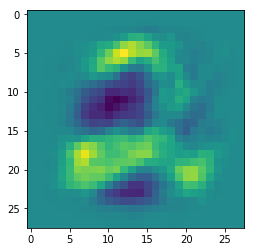

In [559]:
w = d["w"]
plt.imshow(w[:,2].reshape([28,28]))